# **New York City Yellow Taxi Data**

## Objective
In this case study you will be learning exploratory data analysis (EDA) with the help of a dataset on yellow taxi rides in New York City. This will enable you to understand why EDA is an important step in the process of data science and machine learning.

## **Problem Statement**
As an analyst at an upcoming taxi operation in NYC, you are tasked to use the 2023 taxi trip data to uncover insights that could help optimise taxi operations. The goal is to analyse patterns in the data that can inform strategic decisions to improve service efficiency, maximise revenue, and enhance passenger experience.

## Tasks
You need to perform the following steps for successfully completing this assignment:
1. Data Loading
2. Data Cleaning
3. Exploratory Analysis: Bivariate and Multivariate
4. Creating Visualisations to Support the Analysis
5. Deriving Insights and Stating Conclusions

---

**NOTE:** The marks given along with headings and sub-headings are cumulative marks for those particular headings/sub-headings.<br>

The actual marks for each task are specified within the tasks themselves.

For example, marks given with heading *2* or sub-heading *2.1* are the cumulative marks, for your reference only. <br>

The marks you will receive for completing tasks are given with the tasks.

Suppose the marks for two tasks are: 3 marks for 2.1.1 and 2 marks for 3.2.2, or
* 2.1.1 [3 marks]
* 3.2.2 [2 marks]

then, you will earn 3 marks for completing task 2.1.1 and 2 marks for completing task 3.2.2.


---

## Data Understanding
The yellow taxi trip records include fields capturing pick-up and drop-off dates/times, pick-up and drop-off locations, trip distances, itemized fares, rate types, payment types, and driver-reported passenger counts.

The data is stored in Parquet format (*.parquet*). The dataset is from 2009 to 2024. However, for this assignment, we will only be using the data from 2023.

The data for each month is present in a different parquet file. You will get twelve files for each of the months in 2023.

The data was collected and provided to the NYC Taxi and Limousine Commission (TLC) by technology providers like vendors and taxi hailing apps. <br>

You can find the link to the TLC trip records page here: https://www.nyc.gov/site/tlc/about/tlc-trip-record-data.page

###  Data Description
You can find the data description here: [Data Dictionary](https://www.nyc.gov/assets/tlc/downloads/pdf/data_dictionary_trip_records_yellow.pdf)

**Trip Records**



|Field Name       |description |
|:----------------|:-----------|
| VendorID | A code indicating the TPEP provider that provided the record. <br> 1= Creative Mobile Technologies, LLC; <br> 2= VeriFone Inc. |
| tpep_pickup_datetime | The date and time when the meter was engaged.  |
| tpep_dropoff_datetime | The date and time when the meter was disengaged.   |
| Passenger_count | The number of passengers in the vehicle. <br> This is a driver-entered value. |
| Trip_distance | The elapsed trip distance in miles reported by the taximeter. |
| PULocationID | TLC Taxi Zone in which the taximeter was engaged |
| DOLocationID | TLC Taxi Zone in which the taximeter was disengaged |
|RateCodeID |The final rate code in effect at the end of the trip.<br> 1 = Standard rate <br> 2 = JFK <br> 3 = Newark <br>4 = Nassau or Westchester <br>5 = Negotiated fare <br>6 = Group ride |
|Store_and_fwd_flag |This flag indicates whether the trip record was held in vehicle memory before sending to the vendor, aka “store and forward,” because the vehicle did not have a connection to the server.  <br>Y= store and forward trip <br>N= not a store and forward trip |
|Payment_type| A numeric code signifying how the passenger paid for the trip. <br> 1 = Credit card <br>2 = Cash <br>3 = No charge <br>4 = Dispute <br>5 = Unknown <br>6 = Voided trip |
|Fare_amount| The time-and-distance fare calculated by the meter. <br>Extra Miscellaneous extras and surcharges.  Currently, this only includes the 0.50 and 1 USD rush hour and overnight charges. |
|MTA_tax |0.50 USD MTA tax that is automatically triggered based on the metered rate in use. |
|Improvement_surcharge | 0.30 USD improvement surcharge assessed trips at the flag drop. The improvement surcharge began being levied in 2015. |
|Tip_amount |Tip amount – This field is automatically populated for credit card tips. Cash tips are not included. |
| Tolls_amount | Total amount of all tolls paid in trip.  |
| total_amount | The total amount charged to passengers. Does not include cash tips. |
|Congestion_Surcharge |Total amount collected in trip for NYS congestion surcharge. |
| Airport_fee | 1.25 USD for pick up only at LaGuardia and John F. Kennedy Airports|

Although the amounts of extra charges and taxes applied are specified in the data dictionary, you will see that some cases have different values of these charges in the actual data.

**Taxi Zones**

Each of the trip records contains a field corresponding to the location of the pickup or drop-off of the trip, populated by numbers ranging from 1-263.

These numbers correspond to taxi zones, which may be downloaded as a table or map/shapefile and matched to the trip records using a join.

This is covered in more detail in later sections.

---

## **1** Data Preparation

<font color = red>[5 marks]</font> <br>

### Import Libraries

In [1]:
# Import warnings

import warnings
warnings.filterwarnings("ignore")


In [2]:
# Import the libraries you will be using for analysis

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import os


In [3]:
# Recommended versions
# numpy version: 1.26.4
# pandas version: 2.2.2
# matplotlib version: 3.10.0
# seaborn version: 0.13.2

# Check versions
print("numpy version:", np.__version__)
print("pandas version:", pd.__version__)
print("matplotlib version:", plt.matplotlib.__version__)
print("seaborn version:", sns.__version__)

numpy version: 2.0.2
pandas version: 2.2.2
matplotlib version: 3.10.0
seaborn version: 0.13.2


### **1.1** Load the dataset
<font color = red>[5 marks]</font> <br>

You will see twelve files, one for each month.

To read parquet files with Pandas, you have to follow a similar syntax as that for CSV files.

`df = pd.read_parquet('file.parquet')`

In [6]:
# Try loading one file

df = pd.read_parquet('2023-1.parquet')
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 3041714 entries, 0 to 3066765
Data columns (total 19 columns):
 #   Column                 Dtype         
---  ------                 -----         
 0   VendorID               int64         
 1   tpep_pickup_datetime   datetime64[us]
 2   tpep_dropoff_datetime  datetime64[us]
 3   passenger_count        float64       
 4   trip_distance          float64       
 5   RatecodeID             float64       
 6   store_and_fwd_flag     object        
 7   PULocationID           int64         
 8   DOLocationID           int64         
 9   payment_type           int64         
 10  fare_amount            float64       
 11  extra                  float64       
 12  mta_tax                float64       
 13  tip_amount             float64       
 14  tolls_amount           float64       
 15  improvement_surcharge  float64       
 16  total_amount           float64       
 17  congestion_surcharge   float64       
 18  airport_fee            floa

How many rows are there? Do you think handling such a large number of rows is computationally feasible when we have to combine the data for all twelve months into one?

To handle this, we need to sample a fraction of data from each of the files. How to go about that? Think of a way to select only some portion of the data from each month's file that accurately represents the trends.

#### Sampling the Data
> One way is to take a small percentage of entries for pickup in every hour of a date. So, for all the days in a month, we can iterate through the hours and select 5% values randomly from those. Use `tpep_pickup_datetime` for this. Separate date and hour from the datetime values and then for each date, select some fraction of trips for each of the 24 hours.

To sample data, you can use the `sample()` method. Follow this syntax:

```Python
# sampled_data is an empty DF to keep appending sampled data of each hour
# hour_data is the DF of entries for an hour 'X' on a date 'Y'

sample = hour_data.sample(frac = 0.05, random_state = 42)
# sample 0.05 of the hour_data
# random_state is just a seed for sampling, you can define it yourself

sampled_data = pd.concat([sampled_data, sample]) # adding data for this hour to the DF
```

This *sampled_data* will contain 5% values selected at random from each hour.

Note that the code given above is only the part that will be used for sampling and not the complete code required for sampling and combining the data files.

Keep in mind that you sample by date AND hour, not just hour. (Why?)

---

**1.1.1** <font color = red>[5 marks]</font> <br>
Figure out how to sample and combine the files.

**Note:** It is not mandatory to use the method specified above. While sampling, you only need to make sure that your sampled data represents the overall data of all the months accurately.

In [7]:
# Sample the data
# It is recommmended to not load all the files at once to avoid memory overload

In [8]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [9]:
# Take a small percentage of entries from each hour of every date.
# Iterating through the monthly data:
#   read a month file -> day -> hour: append sampled data -> move to next hour -> move to next day after 24 hours -> move to next month file
# Create a single dataframe for the year combining all the monthly data

# Select the folder having data files
import os

# Select the folder having data files
os.chdir('/content/drive/MyDrive/NYC_Taxi_Records_EDA/trip_records')

# Create a list of all the twelve files to read
file_list = os.listdir()

# initialise an empty dataframe
df = pd.DataFrame()

# iterate through the list of files and sample one by one:
for file_name in file_list:
    try:
        # file path for the current file
        if file_name.startswith('2023') and file_name.endswith('.parquet'):
          file_path = os.path.join(os.getcwd(), file_name)
        else:
          continue

        # Reading the current file
        print('Successfully Read ', file_path)
        monthly_df = pd.read_parquet(file_path)

        # We will store the sampled data for the current date in this df by appending the sampled data from each hour to this
        # After completing iteration through each date, we will append this data to the final dataframe.
        sampled_data = pd.DataFrame()

        monthly_df['pickup_date'] = monthly_df['tpep_pickup_datetime'].dt.date
        monthly_df['pickup_hour'] = monthly_df['tpep_pickup_datetime'].dt.hour
        all_dates = sorted(monthly_df['pickup_date'].unique())

        # Loop through dates and then loop through every hour of each date
        for each_date in all_dates:
          day_data = monthly_df[monthly_df['pickup_date'] == each_date]

          # Iterate through each hour of the selected date
          for hour in range(24):
            hour_data = day_data[day_data['pickup_hour'] == hour]

            # Sample 5% of the hourly data randomly
            if not hour_data.empty:
              sample = hour_data.sample(frac=0.05, random_state=42)

              # add data of this hour to the dataframe
              sampled_data = pd.concat([sampled_data, sample], ignore_index=True)

        # Concatenate the sampled data of all the dates to a single dataframe
        df = pd.concat([df, sampled_data], ignore_index=True)

    except Exception as e:
        print(f"Error reading file {file_name}: {e}")

Successfully Read  /content/drive/MyDrive/NYC_Taxi_Records_EDA/trip_records/2023-1.parquet
Successfully Read  /content/drive/MyDrive/NYC_Taxi_Records_EDA/trip_records/2023-2.parquet
Successfully Read  /content/drive/MyDrive/NYC_Taxi_Records_EDA/trip_records/2023-3.parquet
Successfully Read  /content/drive/MyDrive/NYC_Taxi_Records_EDA/trip_records/2023-4.parquet
Successfully Read  /content/drive/MyDrive/NYC_Taxi_Records_EDA/trip_records/2023-5.parquet
Successfully Read  /content/drive/MyDrive/NYC_Taxi_Records_EDA/trip_records/2023-6.parquet
Successfully Read  /content/drive/MyDrive/NYC_Taxi_Records_EDA/trip_records/2023-7.parquet
Successfully Read  /content/drive/MyDrive/NYC_Taxi_Records_EDA/trip_records/2023-8.parquet
Successfully Read  /content/drive/MyDrive/NYC_Taxi_Records_EDA/trip_records/2023-9.parquet
Successfully Read  /content/drive/MyDrive/NYC_Taxi_Records_EDA/trip_records/2023-10.parquet
Successfully Read  /content/drive/MyDrive/NYC_Taxi_Records_EDA/trip_records/2023-11.parqu

After combining the data files into one DataFrame, convert the new DataFrame to a CSV or parquet file and store it to use directly.

Ideally, you can try keeping the total entries to around 250,000 to 300,000.

In [10]:
df.shape

(1896400, 22)

In [11]:
# Store the df in csv/parquet
df.to_parquet('/content/drive/MyDrive/NYC_Taxi_Records_EDA/trip_records/NYC_Sampled_Dataset_For_All_12_Months_5perc.parquet', index=False)
df.to_csv('/content/drive/MyDrive/NYC_Taxi_Records_EDA/trip_records/NYC_Sampled_Dataset_For_All_12_Months_5perc.csv', index=False)

## **2** Data Cleaning
<font color = red>[30 marks]</font> <br>

Now we can load the new data directly.

In [25]:
# Load the new data file

import os
import warnings
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
warnings.filterwarnings("ignore")

from google.colab import drive
drive.mount('/content/drive')

os.chdir('/content/drive/MyDrive/NYC_Taxi_Records_EDA/trip_records')
combined_sampled_file = os.path.join(os.getcwd(), 'NYC_Sampled_Dataset_For_All_12_Months_5perc.parquet')
df = pd.read_parquet(combined_sampled_file)
df.shape

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


(1896400, 22)

In [26]:
df.head()

VendorID tpep_pickup_datetime tpep_dropoff_datetime  passenger_count  \
0         2  2022-12-31 23:51:30   2022-12-31 23:56:06              1.0   
1         2  2023-01-01 00:07:18   2023-01-01 00:23:15              1.0   
2         2  2023-01-01 00:16:41   2023-01-01 00:21:46              2.0   
3         2  2023-01-01 00:14:03   2023-01-01 00:24:36              3.0   
4         2  2023-01-01 00:24:30   2023-01-01 00:29:55              1.0   

   trip_distance  RatecodeID store_and_fwd_flag  PULocationID  DOLocationID  \
0           0.86         1.0                  N           141           140   
1           7.74         1.0                  N           138           256   
2           1.24         1.0                  N           161           237   
3           1.44         1.0                  N           237           141   
4           0.54         1.0                  N           143           142   

   payment_type  ...  mta_tax  tip_amount  tolls_amount  \
0             1  ...      0.5        2.00           0.0   
1             2  ...      0.5        0.00           0.0   
2             1  ...      0.5        2.58           0.0   
3             2  ...      0.5        0.00           0.0   
4             2  ...      0.5        0.00           0.0   

   improvement_surcharge  total_amount  congestion_surcharge  airport_fee  \
0                    1.0         13.50                   2.5         0.00   
1                    1.0         41.15                   0.0         1.25   
2                    1.0         15.48                   2.5         0.00   
3                    1.0         16.40                   2.5         0.00   
4                    1.0         11.50                   2.5         0.00   

   pickup_date  pickup_hour Airport_fee  
0   2022-12-31           23         NaN  
1   2023-01-01            0         NaN  
2   2023-01-01            0         NaN  
3   2023-01-01            0         NaN  
4   2023-01-01            0         NaN  

[5 rows x 22 columns]

In [27]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1896400 entries, 0 to 1896399
Data columns (total 22 columns):
 #   Column                 Dtype         
---  ------                 -----         
 0   VendorID               int64         
 1   tpep_pickup_datetime   datetime64[us]
 2   tpep_dropoff_datetime  datetime64[us]
 3   passenger_count        float64       
 4   trip_distance          float64       
 5   RatecodeID             float64       
 6   store_and_fwd_flag     object        
 7   PULocationID           int64         
 8   DOLocationID           int64         
 9   payment_type           int64         
 10  fare_amount            float64       
 11  extra                  float64       
 12  mta_tax                float64       
 13  tip_amount             float64       
 14  tolls_amount           float64       
 15  improvement_surcharge  float64       
 16  total_amount           float64       
 17  congestion_surcharge   float64       
 18  airport_fee           

#### **2.1** Fixing Columns
<font color = red>[10 marks]</font> <br>

Fix/drop any columns as you seem necessary in the below sections

**2.1.1** <font color = red>[2 marks]</font> <br>

Fix the index and drop unnecessary columns

In [28]:
# Fix the index and drop any columns that are not needed

df.reset_index(drop=True, inplace=True)
df.head()

VendorID tpep_pickup_datetime tpep_dropoff_datetime  passenger_count  \
0         2  2022-12-31 23:51:30   2022-12-31 23:56:06              1.0   
1         2  2023-01-01 00:07:18   2023-01-01 00:23:15              1.0   
2         2  2023-01-01 00:16:41   2023-01-01 00:21:46              2.0   
3         2  2023-01-01 00:14:03   2023-01-01 00:24:36              3.0   
4         2  2023-01-01 00:24:30   2023-01-01 00:29:55              1.0   

   trip_distance  RatecodeID store_and_fwd_flag  PULocationID  DOLocationID  \
0           0.86         1.0                  N           141           140   
1           7.74         1.0                  N           138           256   
2           1.24         1.0                  N           161           237   
3           1.44         1.0                  N           237           141   
4           0.54         1.0                  N           143           142   

   payment_type  ...  mta_tax  tip_amount  tolls_amount  \
0             1  ...      0.5        2.00           0.0   
1             2  ...      0.5        0.00           0.0   
2             1  ...      0.5        2.58           0.0   
3             2  ...      0.5        0.00           0.0   
4             2  ...      0.5        0.00           0.0   

   improvement_surcharge  total_amount  congestion_surcharge  airport_fee  \
0                    1.0         13.50                   2.5         0.00   
1                    1.0         41.15                   0.0         1.25   
2                    1.0         15.48                   2.5         0.00   
3                    1.0         16.40                   2.5         0.00   
4                    1.0         11.50                   2.5         0.00   

   pickup_date  pickup_hour Airport_fee  
0   2022-12-31           23         NaN  
1   2023-01-01            0         NaN  
2   2023-01-01            0         NaN  
3   2023-01-01            0         NaN  
4   2023-01-01            0         NaN  

[5 rows x 22 columns]

**2.1.2** <font color = red>[3 marks]</font> <br>
There are two airport fee columns. This is possibly an error in naming columns. Let's see whether these can be combined into a single column.

In [29]:
# Combine the two airport fee columns

print('Before combining the columns: ', df.shape)
df['airport_fees'] = df['Airport_fee'].combine_first(df['airport_fee'])
df.drop(columns=['airport_fee', 'Airport_fee'], inplace=True)
print('After combining the columns: ', df.shape)

Before combining the columns:  (1896400, 22)
After combining the columns:  (1896400, 21)


**2.1.3** <font color = red>[5 marks]</font> <br>
Fix columns with negative (monetary) values

In [30]:
# check where values of fare amount are negative
print('Checking whether any negative values are there in fare_amount column: ', df[df['fare_amount'] < 0].shape[0])


##------------------------##
## - Output Observation - ##
##------------------------##

# There are no negative amount in fare_amount column

Checking whether any negative values are there in fare_amount column:  0


Did you notice something different in the `RatecodeID` column for above records?

In [31]:
# Analyse RatecodeID for the negative fare amounts

print('Checking whether any negative values are there in fare_amount column: ', df[df['fare_amount'] < 0].shape[0])

##------------------------##
## - Output Observation - ##
##------------------------##

# Since there are no negative amount/negative values in fare_amount column, we can't analyze the RatecodeID with respect to negative fare amounts.
# However, we can quickly check what are the values exists in RatecodeID column which may be used in further analysis.

df['RatecodeID'].value_counts(dropna=False)


Checking whether any negative values are there in fare_amount column:  0


RatecodeID
1.0     1729259
2.0       71670
NaN       64874
99.0      10472
5.0       10275
3.0        6124
4.0        3723
6.0           3
Name: count, dtype: int64

In [32]:
# Find which columns have negative values

all_numeric_columns = ['VendorID', 'passenger_count', 'trip_distance', 'RatecodeID', 'PULocationID', 'DOLocationID', 'payment_type', 'fare_amount', 'extra', 'mta_tax', 'tip_amount', 'tolls_amount', 'improvement_surcharge', 'total_amount', 'congestion_surcharge', 'pickup_hour', 'airport_fees']

for col in all_numeric_columns:
  if ((df[col] < 0).sum()) > 0:
    print(f'Column containing negative values \'{col}\' : ', (df[col] < 0).sum())


Column containing negative values 'extra' :  3
Column containing negative values 'mta_tax' :  73
Column containing negative values 'improvement_surcharge' :  78
Column containing negative values 'total_amount' :  78
Column containing negative values 'congestion_surcharge' :  56
Column containing negative values 'airport_fees' :  15


In [33]:
# fix these negative values

## Since there are only few rows with negative values when compared to the overall row count, I decided to drop these rows.
discarding_negative_values_rows = ['extra', 'mta_tax', 'improvement_surcharge', 'total_amount', 'congestion_surcharge', 'airport_fees']
for col in discarding_negative_values_rows:
  df = df[~(df[col] < 0)]


In [34]:
# Rechecking the negative values once again:
all_numeric_columns = ['VendorID', 'passenger_count', 'trip_distance', 'RatecodeID', 'PULocationID', 'DOLocationID', 'payment_type', 'fare_amount', 'extra', 'mta_tax', 'tip_amount', 'tolls_amount', 'improvement_surcharge', 'total_amount', 'congestion_surcharge', 'pickup_hour', 'airport_fees']
for col in all_numeric_columns:
  if ((df[col] < 0).sum()) > 0:
    print(f'Column containing negative values \'{col}\' : ', (df[col] < 0).sum())

## NOTE: It will print the column only if it contains negative rows.  Otherwise, it will be empty output.


### **2.2** Handling Missing Values
<font color = red>[10 marks]</font> <br>

**2.2.1**  <font color = red>[2 marks]</font> <br>
Find the proportion of missing values in each column




In [35]:
# Find the proportion of missing values in each column

print(f'Total no of Rows in the DataFrame: ', len(df), '\n')
print(f'% of missing values proportion in each column sorted in descending order: \n')
print(((df.isnull().sum() / len(df)) * 100).sort_values(axis=0, ascending=False))
print(f'\nNo of missing rows count in each column sorted in descending order: \n')
print(df.isnull().sum().sort_values(axis=0, ascending=False))
print('\n')


Total no of Rows in the DataFrame:  1896321 

% of missing values proportion in each column sorted in descending order: 

passenger_count          3.421045
airport_fees             3.421045
congestion_surcharge     3.421045
store_and_fwd_flag       3.421045
RatecodeID               3.421045
trip_distance            0.000000
tpep_dropoff_datetime    0.000000
tpep_pickup_datetime     0.000000
VendorID                 0.000000
payment_type             0.000000
fare_amount              0.000000
PULocationID             0.000000
DOLocationID             0.000000
mta_tax                  0.000000
extra                    0.000000
tip_amount               0.000000
tolls_amount             0.000000
total_amount             0.000000
improvement_surcharge    0.000000
pickup_date              0.000000
pickup_hour              0.000000
dtype: float64

No of missing rows count in each column sorted in descending order: 

passenger_count          64874
airport_fees             64874
congestion_surch

**2.2.2**  <font color = red>[3 marks]</font> <br>
Handling missing values in `passenger_count`

In [37]:
# Display the rows with null values
df[df['passenger_count'].isnull()].head()

# Impute NaN values in 'passenger_count'
no_of_passengers_mode = df['passenger_count'].mode()[0]
print('Before Imputing: \n', df['passenger_count'].value_counts(dropna=False))
df['passenger_count'] = df['passenger_count'].fillna(no_of_passengers_mode)
print('\nAfter Imputing: \n', df['passenger_count'].value_counts(dropna=False))
print('Checking the Null Values is cleared or not: ', df['passenger_count'].isnull().sum())

Before Imputing: 
 passenger_count
1.0    1377168
2.0     277283
3.0      69032
NaN      64874
4.0      38532
0.0      29681
5.0      23871
6.0      15859
8.0         11
9.0          5
7.0          5
Name: count, dtype: int64

After Imputing: 
 passenger_count
1.0    1442042
2.0     277283
3.0      69032
4.0      38532
0.0      29681
5.0      23871
6.0      15859
8.0         11
9.0          5
7.0          5
Name: count, dtype: int64
Checking the Null Values is cleared or not:  0


Did you find zeroes in passenger_count? Handle these.

In [38]:
print('Checking Zeros Value Count Before Handling: \n', df['passenger_count'].value_counts(dropna=False))
df = df[~(df['passenger_count'] == 0)]
print('\nChecking Zeros Value Count After Handling: \n', df['passenger_count'].value_counts(dropna=False))

Checking Zeros Value Count Before Handling: 
 passenger_count
1.0    1442042
2.0     277283
3.0      69032
4.0      38532
0.0      29681
5.0      23871
6.0      15859
8.0         11
9.0          5
7.0          5
Name: count, dtype: int64

Checking Zeros Value Count After Handling: 
 passenger_count
1.0    1442042
2.0     277283
3.0      69032
4.0      38532
5.0      23871
6.0      15859
8.0         11
9.0          5
7.0          5
Name: count, dtype: int64


**2.2.3**  <font color = red>[2 marks]</font> <br>
Handle missing values in `RatecodeID`

In [39]:
# Fix missing values in 'RatecodeID'

RatecodeID_mode = df['RatecodeID'].mode()[0]
print('Before Imputing Missing Values with Mode: \n', df['RatecodeID'].value_counts(dropna=False))
df['RatecodeID'] = df['RatecodeID'].fillna(RatecodeID_mode)
print('\nAfter Imputing Missing Values with Mode: \n', df['RatecodeID'].value_counts(dropna=False))

Before Imputing Missing Values with Mode: 
 RatecodeID
1.0     1700678
2.0       70865
NaN       64874
99.0      10437
5.0       10051
3.0        6043
4.0        3689
6.0           3
Name: count, dtype: int64

After Imputing Missing Values with Mode: 
 RatecodeID
1.0     1765552
2.0       70865
99.0      10437
5.0       10051
3.0        6043
4.0        3689
6.0           3
Name: count, dtype: int64


**2.2.4**  <font color = red>[3 marks]</font> <br>
Impute NaN in `congestion_surcharge`

In [40]:
# handle null values in congestion_surcharge

print(f'Before Imputing, the no of Null or Missing Values in \'congestion_surchage\' column: ', df['congestion_surcharge'].isnull().sum(), '\n')
df['congestion_surcharge'].fillna(df['congestion_surcharge'].mode()[0], inplace=True)
print(f'After Imputing, the no of Null or Missing Values in \'congestion_surchage\' column: ', df['congestion_surcharge'].isnull().sum(), '\n')


Before Imputing, the no of Null or Missing Values in 'congestion_surchage' column:  64874 

After Imputing, the no of Null or Missing Values in 'congestion_surchage' column:  0 



Are there missing values in other columns? Did you find NaN values in some other set of columns? Handle those missing values below.

In [42]:
# Handle any remaining missing values

print('Checking are there any other columns with null or missing values: \n')
print(df.isnull().sum().sort_values(ascending=False),'\n')

# Identified that "store_and_fwd_flag" and "airport_fees" contains missing values.
# So I am handling it by imputing with its mode value.

# Before imputing, checking the no of null values on these columns
print(df['store_and_fwd_flag'].value_counts(dropna=False), '\n')
print(df['airport_fees'].value_counts(dropna=False), '\n')

df['store_and_fwd_flag'].fillna((df['store_and_fwd_flag'].mode()[0]), inplace=True)
df['airport_fees'].fillna((df['airport_fees'].mode()[0]), inplace=True)

# After imputing, checking the no of null values are cleared or not
print(df['store_and_fwd_flag'].value_counts(dropna=False), '\n')
print(df['airport_fees'].value_counts(dropna=False), '\n')

print('After imputing, rechecking the entire dataframe whether any columns are still having null or missing values: \n')
print(df.isnull().sum().sort_values(ascending=False),'\n')


Checking are there any other columns with null or missing values: 

store_and_fwd_flag       64874
airport_fees             64874
tpep_dropoff_datetime        0
tpep_pickup_datetime         0
VendorID                     0
trip_distance                0
passenger_count              0
PULocationID                 0
RatecodeID                   0
payment_type                 0
fare_amount                  0
extra                        0
DOLocationID                 0
mta_tax                      0
tip_amount                   0
improvement_surcharge        0
tolls_amount                 0
total_amount                 0
congestion_surcharge         0
pickup_date                  0
pickup_hour                  0
dtype: int64 

store_and_fwd_flag
N       1791432
None      64874
Y         10334
Name: count, dtype: int64 

airport_fees
0.00    1642512
1.75     119886
NaN       64874
1.25      39367
1.00          1
Name: count, dtype: int64 

store_and_fwd_flag
N    1856306
Y      10334
Name:

### **2.3** Handling Outliers
<font color = red>[10 marks]</font> <br>

Before we start fixing outliers, let's perform outlier analysis.

In [43]:
# Describe the data and check if there are any potential outliers present
# Check for potential out of place values in various columns

df.describe()

VendorID        tpep_pickup_datetime       tpep_dropoff_datetime  \
count  1.866640e+06                     1866640                     1866640   
mean   1.744619e+00  2023-07-02 23:54:35.156986  2023-07-03 00:12:03.801032   
min    1.000000e+00         2022-12-31 23:51:30         2022-12-31 23:56:06   
25%    1.000000e+00  2023-04-02 18:11:20.500000  2023-04-02 18:29:17.750000   
50%    2.000000e+00         2023-06-27 19:32:38         2023-06-27 19:46:11   
75%    2.000000e+00  2023-10-06 23:37:18.750000  2023-10-06 23:54:43.750000   
max    6.000000e+00         2023-12-31 23:57:51         2024-01-01 20:50:55   
std    4.414960e-01                         NaN                         NaN   

       passenger_count  trip_distance    RatecodeID  PULocationID  \
count     1.866640e+06   1.866640e+06  1.866640e+06  1.866640e+06   
mean      1.378150e+00   3.875038e+00  1.619864e+00  1.652480e+02   
min       1.000000e+00   0.000000e+00  1.000000e+00  1.000000e+00   
25%       1.000000e+00   1.050000e+00  1.000000e+00  1.320000e+02   
50%       1.000000e+00   1.800000e+00  1.000000e+00  1.620000e+02   
75%       1.000000e+00   3.410000e+00  1.000000e+00  2.340000e+02   
max       9.000000e+00   1.263605e+05  9.900000e+01  2.650000e+02   
std       8.699587e-01   1.304351e+02  7.312306e+00  6.400130e+01   

       DOLocationID  payment_type   fare_amount         extra       mta_tax  \
count  1.866640e+06  1.866640e+06  1.866640e+06  1.866640e+06  1.866640e+06   
mean   1.640227e+02  1.162249e+00  1.996235e+01  1.561189e+00  4.953202e-01   
min    1.000000e+00  0.000000e+00  0.000000e+00  0.000000e+00  0.000000e+00   
25%    1.140000e+02  1.000000e+00  9.300000e+00  0.000000e+00  5.000000e-01   
50%    1.620000e+02  1.000000e+00  1.350000e+01  1.000000e+00  5.000000e-01   
75%    2.340000e+02  1.000000e+00  2.229000e+01  2.500000e+00  5.000000e-01   
max    2.650000e+02  4.000000e+00  1.431635e+05  2.080000e+01  4.000000e+00   
std    6.981914e+01  5.076060e-01  1.063548e+02  1.820560e+00  4.840724e-02   

         tip_amount  tolls_amount  improvement_surcharge  total_amount  \
count  1.866640e+06  1.866640e+06           1.866640e+06  1.866640e+06   
mean   3.555335e+00  5.998000e-01           9.990698e-01  2.903906e+01   
min    0.000000e+00  0.000000e+00           0.000000e+00  0.000000e+00   
25%    1.000000e+00  0.000000e+00           1.000000e+00  1.596000e+01   
50%    2.850000e+00  0.000000e+00           1.000000e+00  2.108000e+01   
75%    4.450000e+00  0.000000e+00           1.000000e+00  3.100000e+01   
max    2.230800e+02  1.430000e+02           1.000000e+00  1.431675e+05   
std    4.056998e+00  2.193114e+00           2.804540e-02  1.072306e+02   

       congestion_surcharge   pickup_hour  airport_fees  
count          1.866640e+06  1.866640e+06  1.866640e+06  
mean           2.314224e+00  1.426855e+01  1.387575e-01  
min            0.000000e+00  0.000000e+00  0.000000e+00  
25%            2.500000e+00  1.100000e+01  0.000000e+00  
50%            2.500000e+00  1.500000e+01  0.000000e+00  
75%            2.500000e+00  1.900000e+01  0.000000e+00  
max            2.500000e+00  2.300000e+01  1.750000e+00  
std            6.556882e-01  5.814620e+00  4.586835e-01

In [44]:
## --------------------------------------------------------------------- ##
## My Observation/Findings for Outliers based on describe command output ##
## --------------------------------------------------------------------- ##

# trip_distance max value is 1.263605e+05 which is likely an invalid value.
# tip_amount max value is 223.08 USD which may be needs to be validated
# payment_type max value is 4 which is a Valid value as per the data dictionary but this is something not happened on regular basis (4=Dispute). So, it is an Outlier and have to be checked.
# VendorID should be either 1 or 2 as per given data dictionary but it contains 6 as max value which may be an invalid value.
# passenger_count typically ranges between 1 or 6 but it contains 9 as max value which may be an invalid value.
# RatecodeID value should be between 1 and 6 as per given data dcitionary but it contains 99 as max value which may be an invalid entry
# mta_tax value should be 0.5 USD as per given data dictionary but it contains 4 as max value which may be an invalid entry
# tolls_amount max value is 143 which is usually not the scenario for a trip.  Need to validate.
# total_amount max value is 143167 which needs to be validated as this usually doesn't happen for a trip
# fare_amount max value is 143163 which needs to be validated as this usually doesn't happen for a trip
# extra max value is 20.8 which may be an invalid value

**2.3.1**  <font color = red>[10 marks]</font> <br>
Based on the above analysis, it seems that some of the outliers are present due to errors in registering the trips. Fix the outliers.

Some points you can look for:
- Entries where `trip_distance` is nearly 0 and `fare_amount` is more than 300
- Entries where `trip_distance` and `fare_amount` are 0 but the pickup and dropoff zones are different (both distance and fare should not be zero for different zones)
- Entries where `trip_distance` is more than 250  miles.
- Entries where `payment_type` is 0 (there is no payment_type 0 defined in the data dictionary)

These are just some suggestions. You can handle outliers in any way you wish, using the insights from above outlier analysis.

How will you fix each of these values? Which ones will you drop and which ones will you replace?

First, let us remove 7+ passenger counts as there are very less instances.

In [45]:
# remove passenger_count > 6

print('Before removing, the number of passengers with more than 6 are: ', (df['passenger_count'] > 6).sum(),'\n')
df = df[~(df['passenger_count'] > 6)]  # Removing the records that contains more than 6 passenger counts
print('After removing the records, just rechecking the passenger count to confirm whether it is removed properly or not: ', (df['passenger_count'] > 6).sum(),'\n')


Before removing, the number of passengers with more than 6 are:  21 

After removing the records, just rechecking the passenger count to confirm whether it is removed properly or not:  0 



In [46]:
# Continue with outlier handling

## Trip Distance is 0 and Fare_Amount > 300
print('## Trip Distance is 0 and Fare_Amount > 300 ##\n')
print('Checking the no of Rows before handling this Outlier: ',((df['trip_distance'] == 0) & (df['fare_amount'] > 300)).sum())
df = df[~((df['trip_distance'] == 0) & (df['fare_amount'] > 300))] # Dropping these rows matching to this condition
print('Verifying the no of Rows after handling this Outlier: ',((df['trip_distance'] == 0) & (df['fare_amount'] > 300)).sum(),'\n')

## Entries where trip_distance and fare_amount are 0 but the pickup and dropoff zones are different (both distance and fare should not be zero for different zones)
print('## Entries where trip_distance and fare_amount are 0 but the pickup and dropoff zones are different ##\n')
print('Checking the no of Rows before handling this Outlier: ', (((df['trip_distance'] == 0) & (df['fare_amount'] == 0)) & (df['PULocationID'] != df['DOLocationID'])).sum())
df = df[~(((df['trip_distance'] == 0) & (df['fare_amount'] == 0)) & (df['PULocationID'] != df['DOLocationID']))] # Dropping these rows matching to this condition
print('Verifying the no of Rows after handling this Outlier: ', (((df['trip_distance'] == 0) & (df['fare_amount'] == 0)) & (df['PULocationID'] != df['DOLocationID'])).sum(),'\n')

## Entries where trip_distance is more than 250 miles
print('## Entries where trip_distance is more than 250 miles ##\n')
print('Checking the no of Rows before handling this Outlier: ', (df['trip_distance'] > 250).sum())
df = df[~(df['trip_distance'] > 250)] # Dropping these rows matching to this condition
print('Verifying the no of Rows after handling this Outlier: ', (df['trip_distance'] > 250).sum(),'\n')

## Entries where payment_type is 0 (there is no payment_type 0 defined in the data dictionary)
print('## Entries where payment_type is 0 ##\n')
print('Checking the no of Rows before handling this Outlier: ', (df['payment_type'] == 0).sum())
df['payment_type'] = df['payment_type'].replace(0, 5) # Imputing or Replacing 0 with 5
print('Verifying the no of Rows after handling this Outlier: ', (df['payment_type'] == 0).sum())



## Trip Distance is 0 and Fare_Amount > 300 ##

Checking the no of Rows before handling this Outlier:  32
Verifying the no of Rows after handling this Outlier:  0 

## Entries where trip_distance and fare_amount are 0 but the pickup and dropoff zones are different ##

Checking the no of Rows before handling this Outlier:  57
Verifying the no of Rows after handling this Outlier:  0 

## Entries where trip_distance is more than 250 miles ##

Checking the no of Rows before handling this Outlier:  46
Verifying the no of Rows after handling this Outlier:  0 

## Entries where payment_type is 0 ##

Checking the no of Rows before handling this Outlier:  64844
Verifying the no of Rows after handling this Outlier:  0


In [47]:
# Do any columns need standardising?

# Just creating a new column called trip_duration based on pickup time and dropoff time.
df['trip_duration'] = (((df['tpep_dropoff_datetime']) - (df['tpep_pickup_datetime'])).dt.total_seconds() / 60)
df['trip_duration'].head()

0     4.600000
1    15.950000
2     5.083333
3    10.550000
4     5.416667
Name: trip_duration, dtype: float64

## **3** Exploratory Data Analysis
<font color = red>[90 marks]</font> <br>

In [49]:
df.columns.tolist()

['VendorID',
 'tpep_pickup_datetime',
 'tpep_dropoff_datetime',
 'passenger_count',
 'trip_distance',
 'RatecodeID',
 'store_and_fwd_flag',
 'PULocationID',
 'DOLocationID',
 'payment_type',
 'fare_amount',
 'extra',
 'mta_tax',
 'tip_amount',
 'tolls_amount',
 'improvement_surcharge',
 'total_amount',
 'congestion_surcharge',
 'pickup_date',
 'pickup_hour',
 'airport_fees',
 'trip_duration']

#### **3.1** General EDA: Finding Patterns and Trends
<font color = red>[40 marks]</font> <br>

**3.1.1** <font color = red>[3 marks]</font> <br>
Categorise the varaibles into Numerical or Categorical.
* `VendorID`:
* `tpep_pickup_datetime`:
* `tpep_dropoff_datetime`:
* `passenger_count`:
* `trip_distance`:
* `RatecodeID`:
* `PULocationID`:
* `DOLocationID`:
* `payment_type`:
* `pickup_hour`:
* `trip_duration`:


The following monetary parameters belong in the same category, is it categorical or numerical?


* `fare_amount`
* `extra`
* `mta_tax`
* `tip_amount`
* `tolls_amount`
* `improvement_surcharge`
* `total_amount`
* `congestion_surcharge`
* `airport_fee`

In [50]:
## ---------------------------------------------------------------- ##
##  From the above list, I have categorized the columns accordingly ##
## ---------------------------------------------------------------- ##

## Here, the Numerical Variables/Columns are:
## 'passenger_count','trip_distance','pickup_hour','trip_duration','fare_amount','extra','mta_tax','tip_amount','tolls_amount','improvement_surcharge','total_amount','congestion_surcharge','airport_fee'

## And the Categorical Variables/Columns are:
## 'VendorID','RatecodeID','PULocationID','DOLocationID','payment_type'

## And, the Temporal Variables/Columns are:
## 'tpep_pickup_datetime','tpep_dropoff_datetime'

## And, the Monetary Columns are:
## 'fare_amount','extra','mta_tax','tip_amount','tolls_amount','improvement_surcharge','total_amount','congestion_surcharge','airport_fee']

From the above list, I have categorized the columns accordingly:

- Here, the Numerical Variables/Columns are:
'passenger_count','trip_distance','pickup_hour','trip_duration','fare_amount','extra','mta_tax','tip_amount','tolls_amount','improvement_surcharge','total_amount','congestion_surcharge','airport_fee'

- And, the Categorical Variables/Columns are:
'VendorID','RatecodeID','PULocationID','DOLocationID','payment_type'

- And, the Temporal Variables/Columns are:
'tpep_pickup_datetime','tpep_dropoff_datetime'

- And, the Monetary Columns are
'fare_amount','extra','mta_tax','tip_amount','tolls_amount','improvement_surcharge','total_amount','congestion_surcharge','airport_fee']



##### Temporal Analysis

**3.1.2** <font color = red>[5 marks]</font> <br>
Analyse the distribution of taxi pickups by hours, days of the week, and months.

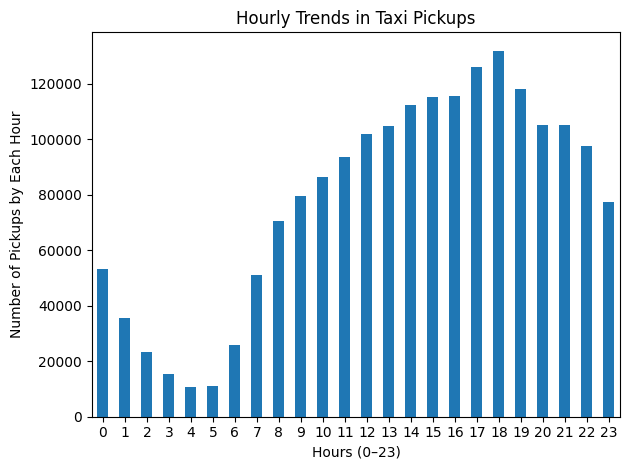

In [51]:
# Find and show the hourly trends in taxi pickups

df['pickup_hour'].value_counts().sort_index().plot.bar()

plt.title('Hourly Trends in Taxi Pickups')
plt.xlabel('Hours (0–23)')
plt.ylabel('Number of Pickups by Each Hour')
plt.xticks(range(0, 24), rotation=0)
plt.tight_layout()
plt.show()

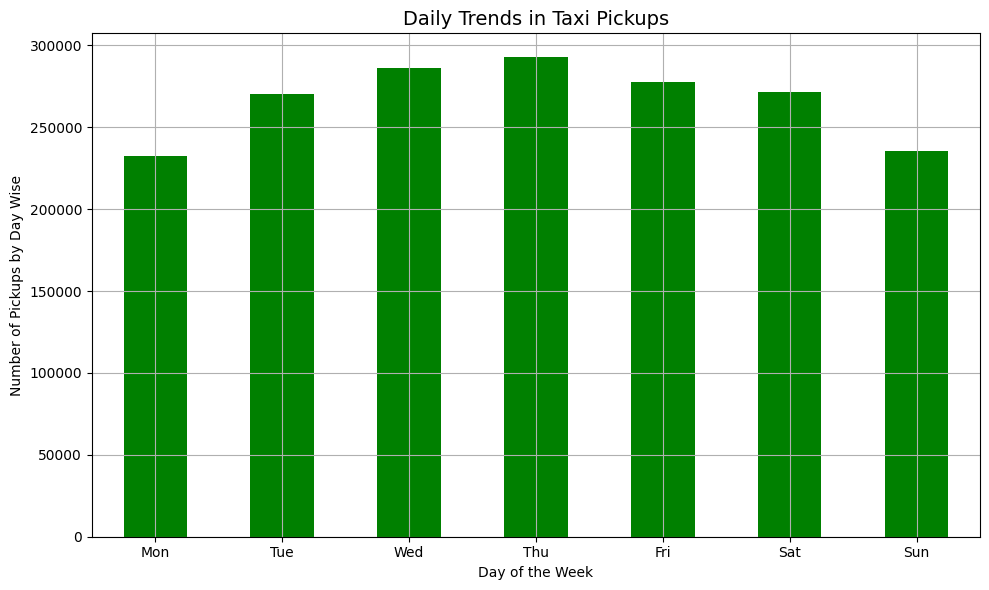

In [52]:
# Find and show the daily trends in taxi pickups (days of the week)

df['day_of_week'] = df['tpep_pickup_datetime'].dt.dayofweek  ## Identify the Day Code for the extracted Date and store it in "day_of_week"
map_the_day = {0: 'Mon', 1: 'Tue', 2: 'Wed', 3: 'Thu', 4: 'Fri', 5: 'Sat', 6: 'Sun'} # Define a dictionary variable
df['day_of_week'] = df['day_of_week'].map(map_the_day) # Map the Day Code to Actual Day Name

daily_pickups = df['day_of_week'].value_counts().reindex(['Mon', 'Tue', 'Wed', 'Thu', 'Fri', 'Sat', 'Sun'])
plt.figure(figsize=(10, 6))
daily_pickups.plot(kind='bar', color='green')
plt.title('Daily Trends in Taxi Pickups', fontsize=14)
plt.xlabel('Day of the Week')
plt.ylabel('Number of Pickups by Day Wise')
plt.xticks(rotation=0)
plt.grid(True)
plt.tight_layout()
plt.show()

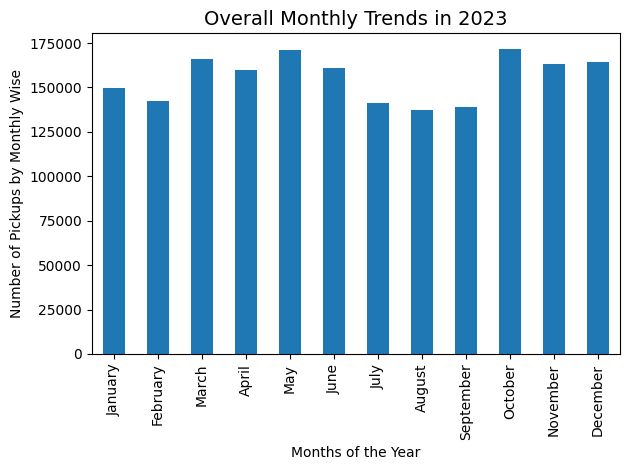

In [53]:
# Show the monthly trends in pickups

df['pickup_month'] = df['tpep_pickup_datetime'].dt.month_name() ## Identify the Month Name and store it in a column "pickup_month"
df['pickup_month'].value_counts().reindex(['January','February','March','April','May','June','July','August','September','October','November','December']).plot.bar()
plt.title('Overall Monthly Trends in 2023', fontsize=14)
plt.xlabel('Months of the Year')
plt.ylabel('Number of Pickups by Monthly Wise')
plt.tight_layout()
plt.show()

##### Financial Analysis

Take a look at the financial parameters like `fare_amount`, `tip_amount`, `total_amount`, and also `trip_distance`. Do these contain zero/negative values?

In [54]:
# Analyse the above parameters

print("No of Zeros in \'fare_amount\': ", (df['fare_amount'] == 0).sum())
print("No of Zeros in \'tip_amount\': ", (df['tip_amount'] == 0).sum())
print("No of Zeros in \'total_amount\': ", (df['total_amount'] == 0).sum())
print("No of Zeros in \'trip_distance\': ", (df['trip_distance'] == 0).sum(),'\n')

print("No of Negative Values in \'fare_amount\': ", (df['fare_amount'] < 0).sum())
print("No of Negative Values in \'tip_amount\': ", (df['tip_amount'] < 0).sum())
print("No of Negative Values in \'total_amount\': ", (df['total_amount'] < 0).sum())
print("No of Negative Values in \'trip_distance\': ", (df['trip_distance'] < 0).sum(),'\n')

No of Zeros in 'fare_amount':  478
No of Zeros in 'tip_amount':  427941
No of Zeros in 'total_amount':  249
No of Zeros in 'trip_distance':  36719 

No of Negative Values in 'fare_amount':  0
No of Negative Values in 'tip_amount':  0
No of Negative Values in 'total_amount':  0
No of Negative Values in 'trip_distance':  0 



Do you think it is beneficial to create a copy DataFrame leaving out the zero values from these?

**3.1.3** <font color = red>[2 marks]</font> <br>
Filter out the zero values from the above columns.

**Note:** The distance might be 0 in cases where pickup and drop is in the same zone. Do you think it is suitable to drop such cases of zero distance?

In [69]:
# Create a df with non zero entries for the selected parameters.

df2 = df.copy()
print(df2.shape)

fin_cols = ['fare_amount','tip_amount','total_amount','trip_distance']
for col_name in fin_cols:
  df2 = df2[~(df2[col_name] == 0)]

print(df2.shape)

print("No of Zeros in \'fare_amount\': ", (df2['fare_amount'] == 0).sum())
print("No of Zeros in \'tip_amount\': ", (df2['tip_amount'] == 0).sum())
print("No of Zeros in \'total_amount\': ", (df2['total_amount'] == 0).sum())
print("No of Zeros in \'trip_distance\': ", (df2['trip_distance'] == 0).sum(),'\n')

print("No of Negative Values in \'fare_amount\': ", (df2['fare_amount'] < 0).sum())
print("No of Negative Values in \'tip_amount\': ", (df2['tip_amount'] < 0).sum())
print("No of Negative Values in \'total_amount\': ", (df2['total_amount'] < 0).sum())
print("No of Negative Values in \'trip_distance\': ", (df2['trip_distance'] < 0).sum(),'\n')



(1866484, 24)
(1429590, 24)
No of Zeros in 'fare_amount':  0
No of Zeros in 'tip_amount':  0
No of Zeros in 'total_amount':  0
No of Zeros in 'trip_distance':  0 

No of Negative Values in 'fare_amount':  0
No of Negative Values in 'tip_amount':  0
No of Negative Values in 'total_amount':  0
No of Negative Values in 'trip_distance':  0 



**3.1.4** <font color = red>[3 marks]</font> <br>
Analyse the monthly revenue (`total_amount`) trend

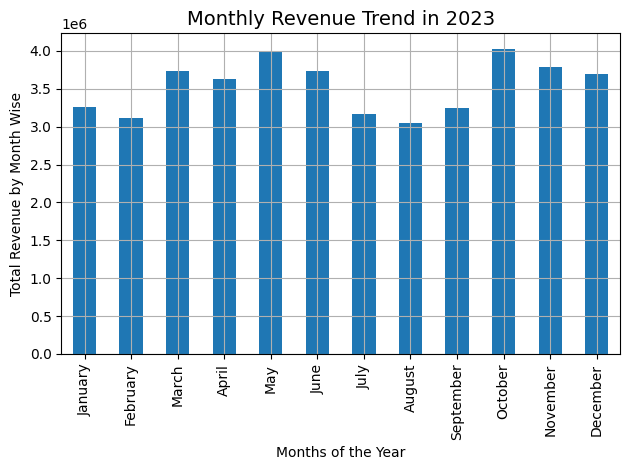

In [70]:
# Group data by month and analyse monthly revenue

df2.groupby('pickup_month')['total_amount'].sum()
df2.groupby('pickup_month')['total_amount'].sum().reindex(['January', 'February', 'March', 'April', 'May', 'June', 'July', 'August', 'September', 'October', 'November', 'December']).plot.bar()

plt.title('Monthly Revenue Trend in 2023', fontsize=14)
plt.xlabel('Months of the Year')
plt.ylabel('Total Revenue by Month Wise')
plt.grid(True)
plt.tight_layout()
plt.show()


**3.1.5** <font color = red>[3 marks]</font> <br>
Show the proportion of each quarter of the year in the revenue

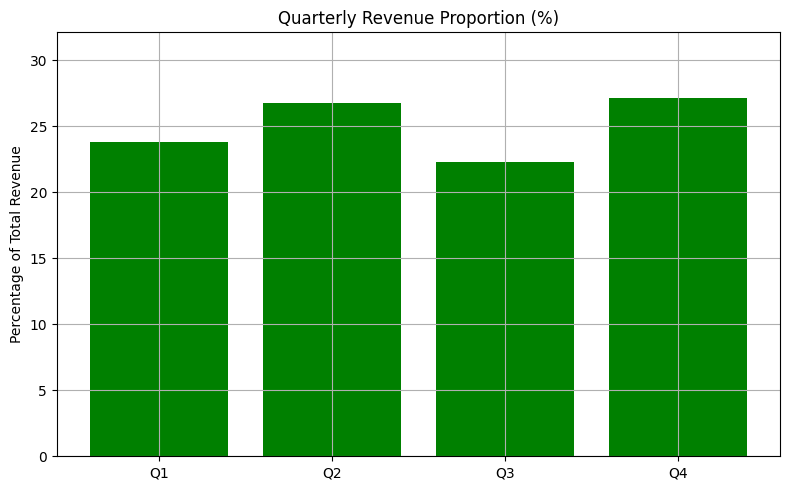

In [71]:
# Calculate proportion of each quarter


# Finding each months revenue and then finding the total revenue for the year to find the proportion of each quarter revenue
monthly_revenue = df2.groupby('pickup_month')['total_amount'].sum().reindex(['January', 'February', 'March', 'April', 'May', 'June', 'July', 'August', 'September', 'October', 'November', 'December'])
total_revenue_2023 = monthly_revenue.sum()

# Finding the quarterly revenue proportion by adding the revenue of 3 months of each quarter
Quarterly_Revenue_Proportion = []
j=0
quarterly_revenue = 0
while j < 12:
  quarterly_revenue = quarterly_revenue + monthly_revenue.iloc[j]
  j = j + 1
  if j in [3, 6, 9, 12]:
    Quarterly_Revenue_Proportion.append((quarterly_revenue/total_revenue_2023)*100)
    quarterly_revenue = 0

# Defining the Labels and plotting the graph
quarters = ['Q1', 'Q2', 'Q3', 'Q4']
plt.figure(figsize=(8, 5))
plt.bar(quarters, Quarterly_Revenue_Proportion, color='green')
plt.title('Quarterly Revenue Proportion (%)')
plt.ylabel('Percentage of Total Revenue')
plt.ylim(0, max(Quarterly_Revenue_Proportion) + 5)
plt.grid(True)
plt.tight_layout()
plt.show()

**3.1.6** <font color = red>[3 marks]</font> <br>
Visualise the relationship between `trip_distance` and `fare_amount`. Also find the correlation value for these two.

**Hint:** You can leave out the trips with trip_distance = 0

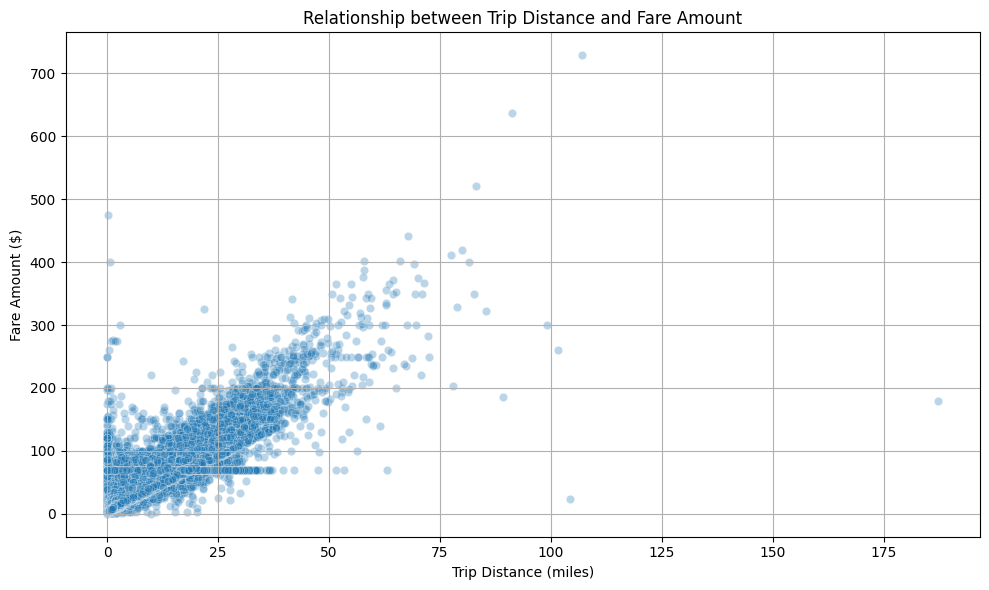

Correlation between Distance & Fare:  0.9489998688385604


In [72]:
# Show how trip fare is affected by distance

plt.figure(figsize=(10, 6))
sns.scatterplot(data=df2, x='trip_distance', y='fare_amount', alpha=0.3)
plt.title('Relationship between Trip Distance and Fare Amount')
plt.xlabel('Trip Distance (miles)')
plt.ylabel('Fare Amount ($)')
plt.grid(True)
plt.tight_layout()
plt.show()

correlation = df2['trip_distance'].corr(df2['fare_amount'])
print('Correlation between Distance & Fare: ', correlation)


**3.1.7** <font color = red>[5 marks]</font> <br>
Find and visualise the correlation between:
1. `fare_amount` and trip duration (pickup time to dropoff time)
2. `fare_amount` and `passenger_count`
3. `tip_amount` and `trip_distance`

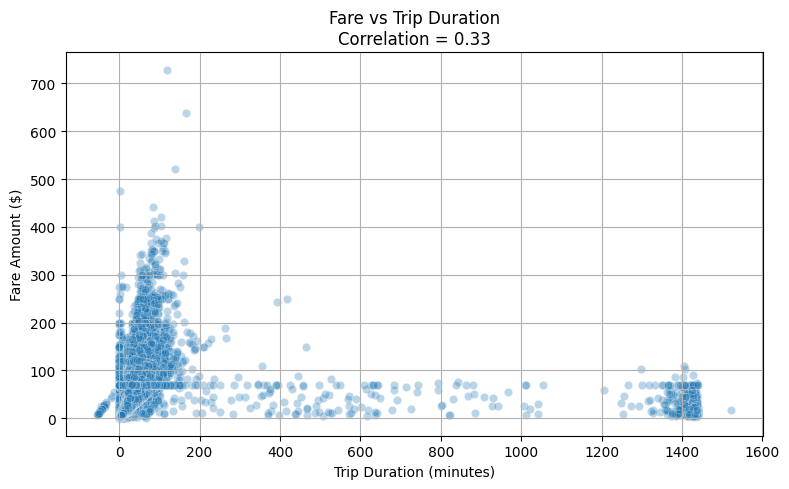

np.float64(0.3304347132209425)

In [73]:
# Show relationship between fare and trip duration

corr_fare_duration = df2['fare_amount'].corr(df2['trip_duration'])

plt.figure(figsize=(8, 5))
sns.scatterplot(data=df2, x='trip_duration', y='fare_amount', alpha=0.3)
plt.title(f'Fare vs Trip Duration\nCorrelation = {corr_fare_duration:.2f}')
plt.xlabel('Trip Duration (minutes)')
plt.ylabel('Fare Amount ($)')
plt.grid(True)
plt.tight_layout()
plt.show()

corr_fare_duration

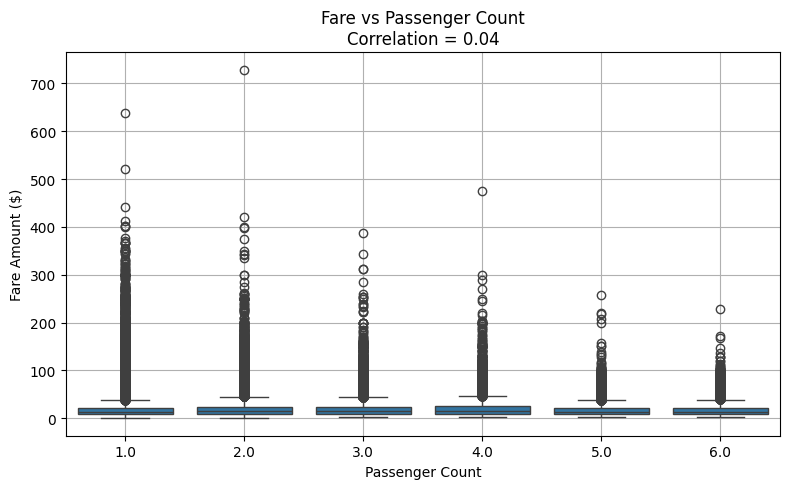

np.float64(0.035279491338451575)

In [74]:
# Show relationship between fare and number of passengers

corr_fare_passenger = df2['fare_amount'].corr(df2['passenger_count'])
plt.figure(figsize=(8, 5))
sns.boxplot(data=df2, x='passenger_count', y='fare_amount')
plt.title(f'Fare vs Passenger Count\nCorrelation = {corr_fare_passenger:.2f}')
plt.xlabel('Passenger Count')
plt.ylabel('Fare Amount ($)')
plt.grid(True)
plt.tight_layout()
plt.show()

corr_fare_passenger

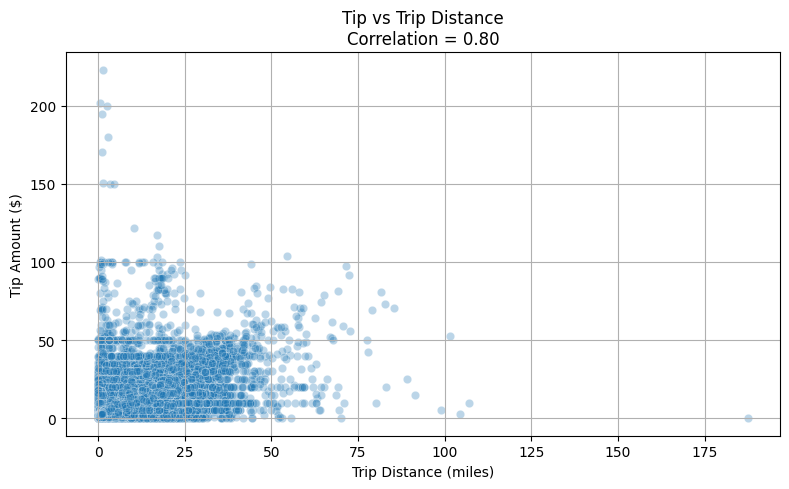

np.float64(0.7989617569451086)

In [75]:
# Show relationship between tip and trip distance

corr_tip_distance = df2['tip_amount'].corr(df2['trip_distance'])
plt.figure(figsize=(8, 5))
sns.scatterplot(data=df2, x='trip_distance', y='tip_amount', alpha=0.3)
plt.title(f'Tip vs Trip Distance\nCorrelation = {corr_tip_distance:.2f}')
plt.xlabel('Trip Distance (miles)')
plt.ylabel('Tip Amount ($)')
plt.grid(True)
plt.tight_layout()
plt.show()

corr_tip_distance

**3.1.8** <font color = red>[3 marks]</font> <br>
Analyse the distribution of different payment types (`payment_type`)

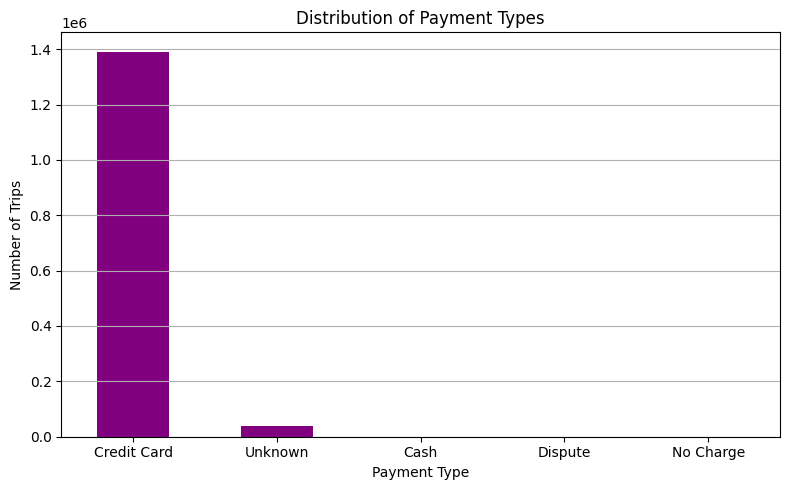

In [76]:
# Analyse the distribution of different payment types (payment_type).

map_payment = {1: 'Credit Card', 2: 'Cash', 3: 'No Charge', 4: 'Dispute', 5: 'Unknown', 6: 'Voided trip'}
payment_counts = df2['payment_type'].map(map_payment).value_counts()

plt.figure(figsize=(8, 5))
payment_counts.plot(kind='bar', color='purple')
plt.title('Distribution of Payment Types')
plt.xlabel('Payment Type')
plt.ylabel('Number of Trips')
plt.xticks(rotation=0)
plt.grid(axis='y')
plt.tight_layout()
plt.show()


- 1= Credit card
- 2= Cash
- 3= No charge
- 4= Dispute



##### Geographical Analysis

For this, you have to use the *taxi_zones.shp* file from the *taxi_zones* folder.

There would be multiple files inside the folder (such as *.shx, .sbx, .sbn* etc). You do not need to import/read any of the files other than the shapefile, *taxi_zones.shp*.

Do not change any folder structure - all the files need to be present inside the folder for it to work.

The folder structure should look like this:
```
Taxi Zones
|- taxi_zones.shp.xml
|- taxi_zones.prj
|- taxi_zones.sbn
|- taxi_zones.shp
|- taxi_zones.dbf
|- taxi_zones.shx
|- taxi_zones.sbx

 ```

 You only need to read the `taxi_zones.shp` file. The *shp* file will utilise the other files by itself.

We will use the *GeoPandas* library for geopgraphical analysis
```
import geopandas as gpd
```

More about geopandas and shapefiles: [About](https://geopandas.org/en/stable/about.html)


Reading the shapefile is very similar to *Pandas*. Use `gpd.read_file()` function to load the data (*taxi_zones.shp*) as a GeoDataFrame. Documentation: [Reading and Writing Files](https://geopandas.org/en/stable/docs/user_guide/io.html)

In [77]:
!pip install geopandas shapely

**3.1.9** <font color = red>[2 marks]</font> <br>
Load the shapefile and display it.

In [78]:
import geopandas as gpd
import shapely
import os

from google.colab import drive
drive.mount('/content/drive')

# Read the shapefile using geopandas

os.chdir('/content/drive/MyDrive/NYC_Taxi_Records_EDA/taxi_zones/')
folder_path = '/content/drive/MyDrive/NYC_Taxi_Records_EDA/taxi_zones/'
all_files = os.listdir(folder_path)
print(all_files)

zones = gpd.read_file("taxi_zones.shp")
zones.head(1)


Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).
['taxi_zones.dbf', 'taxi_zones.shp', 'taxi_zones.sbx', 'taxi_zones.shp.xml', 'taxi_zones.sbn', 'taxi_zones.shx', 'taxi_zones.prj']


OBJECTID  Shape_Leng  Shape_Area            zone  LocationID borough  \
0         1    0.116357    0.000782  Newark Airport           1     EWR   

                                            geometry  
0  POLYGON ((933100.918 192536.086, 933091.011 19...

Now, if you look at the DataFrame created, you will see columns like: `OBJECTID`,`Shape_Leng`, `Shape_Area`, `zone`, `LocationID`, `borough`, `geometry`.
<br><br>

Now, the `locationID` here is also what we are using to mark pickup and drop zones in the trip records.

The geometric parameters like shape length, shape area and geometry are used to plot the zones on a map.

This can be easily done using the `plot()` method.

<class 'geopandas.geodataframe.GeoDataFrame'>
RangeIndex: 263 entries, 0 to 262
Data columns (total 7 columns):
 #   Column      Non-Null Count  Dtype   
---  ------      --------------  -----   
 0   OBJECTID    263 non-null    int32   
 1   Shape_Leng  263 non-null    float64 
 2   Shape_Area  263 non-null    float64 
 3   zone        263 non-null    object  
 4   LocationID  263 non-null    int32   
 5   borough     263 non-null    object  
 6   geometry    263 non-null    geometry
dtypes: float64(2), geometry(1), int32(2), object(2)
memory usage: 12.5+ KB
None


geopandas.geodataframe.GeoDataFrame

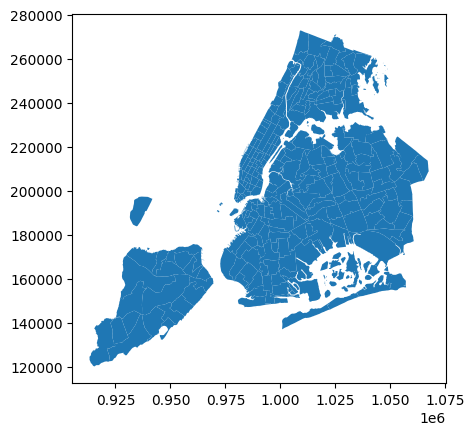

In [79]:
print(zones.info())
zones.plot()
type(zones)

Now, you have to merge the trip records and zones data using the location IDs.



**3.1.10** <font color = red>[3 marks]</font> <br>
Merge the zones data into trip data using the `locationID` and `PULocationID` columns.

In [80]:
# Merge zones and trip records using locationID and PULocationID

print('df2 columns before merging: ', df2.columns)

df2 = df2.merge(
    zones[['LocationID', 'zone', 'borough']],
    how='left',
    left_on='PULocationID',
    right_on='LocationID'
)

# Rename the new columns for better clarity
df2.rename(columns={
    'zone': 'pickup_zone',
    'borough': 'pickup_borough'
}, inplace=True)

print('df2 columns after merging: ', df2.columns)


df2 columns before merging:  Index(['VendorID', 'tpep_pickup_datetime', 'tpep_dropoff_datetime',
       'passenger_count', 'trip_distance', 'RatecodeID', 'store_and_fwd_flag',
       'PULocationID', 'DOLocationID', 'payment_type', 'fare_amount', 'extra',
       'mta_tax', 'tip_amount', 'tolls_amount', 'improvement_surcharge',
       'total_amount', 'congestion_surcharge', 'pickup_date', 'pickup_hour',
       'airport_fees', 'trip_duration', 'day_of_week', 'pickup_month'],
      dtype='object')
df2 columns after merging:  Index(['VendorID', 'tpep_pickup_datetime', 'tpep_dropoff_datetime',
       'passenger_count', 'trip_distance', 'RatecodeID', 'store_and_fwd_flag',
       'PULocationID', 'DOLocationID', 'payment_type', 'fare_amount', 'extra',
       'mta_tax', 'tip_amount', 'tolls_amount', 'improvement_surcharge',
       'total_amount', 'congestion_surcharge', 'pickup_date', 'pickup_hour',
       'airport_fees', 'trip_duration', 'day_of_week', 'pickup_month',
       'LocationID', 'pick

**3.1.11** <font color = red>[3 marks]</font> <br>
Group data by location IDs to find the total number of trips per location ID

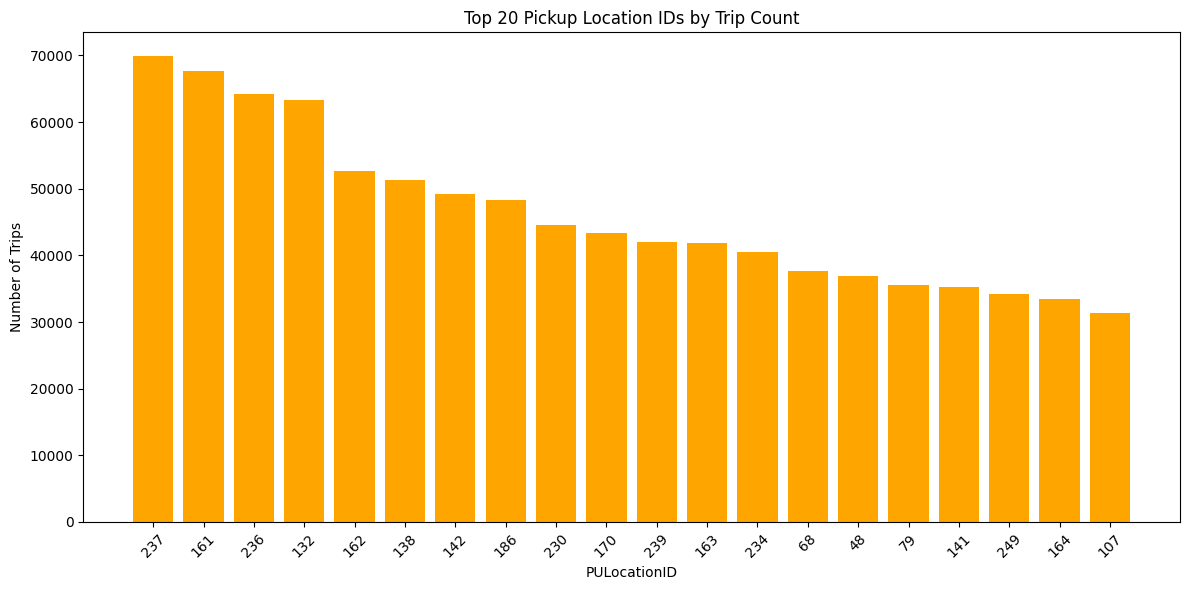

In [81]:
# Group data by location and calculate the number of trips

no_of_trips_per_location = df2.groupby('PULocationID').size().reset_index(name='trip_count')
top_locations = no_of_trips_per_location.sort_values(by='trip_count', ascending=False).head(20)

plt.figure(figsize=(12, 6))
plt.bar(top_locations['PULocationID'].astype(str), top_locations['trip_count'], color='orange')
plt.xlabel('PULocationID')
plt.ylabel('Number of Trips')
plt.title('Top 20 Pickup Location IDs by Trip Count')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()


**3.1.12** <font color = red>[2 marks]</font> <br>
Now, use the grouped data to add number of trips to the GeoDataFrame.

We will use this to plot a map of zones showing total trips per zone.

In [82]:
# Merge trip counts back to the zones GeoDataFrame

no_of_trips_per_location.rename(columns={'PULocationID': 'LocationID'}, inplace=True)
zones = zones.merge(no_of_trips_per_location, how='left', on='LocationID')
zones['trip_count'].fillna(0, inplace=True)

The next step is creating a color map (choropleth map) showing zones by the number of trips taken.

Again, you can use the `zones.plot()` method for this. [Plot Method GPD](https://geopandas.org/en/stable/docs/reference/api/geopandas.GeoDataFrame.plot.html#geopandas.GeoDataFrame.plot)

But first, you need to define the figure and axis for the plot.

`fig, ax = plt.subplots(1, 1, figsize = (12, 10))`

This function creates a figure (fig) and a single subplot (ax)

---

After setting up the figure and axis, we can proceed to plot the GeoDataFrame on this axis. This is done in the next step where we use the plot method of the GeoDataFrame.

You can define the following parameters in the `zones.plot()` method:
```
column = '',
ax = ax,
legend = True,
legend_kwds = {'label': "label", 'orientation': "<horizontal/vertical>"}
```

To display the plot, use `plt.show()`.

**3.1.13** <font color = red>[3 marks]</font> <br>
Plot a color-coded map showing zone-wise trips

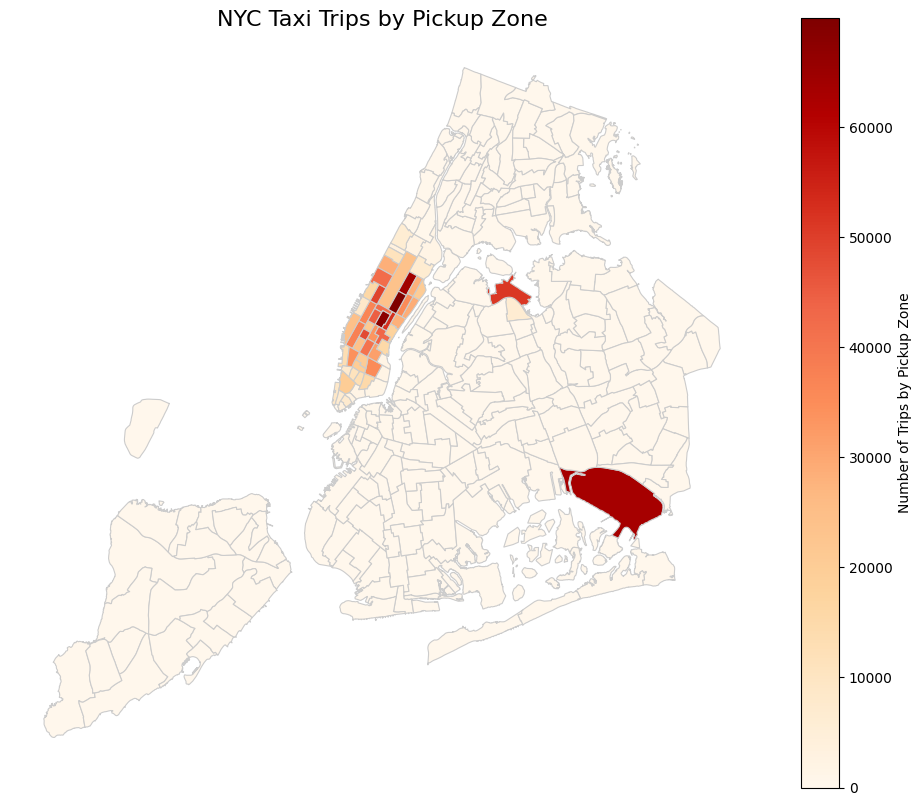

In [83]:
# Define figure and axis
fig, ax = plt.subplots(1, 1, figsize = (12, 10))

# Plot the map and display it
zones.plot(
    column='trip_count',
    cmap='OrRd',
    linewidth=0.8,
    ax=ax,
    edgecolor='0.8',
    legend=True,
    legend_kwds={'label': "Number of Trips by Pickup Zone", 'orientation': "vertical"}
)

ax.set_title("NYC Taxi Trips by Pickup Zone", fontsize=16)
ax.axis('off')
plt.show()

In [84]:
# can you try displaying the zones DF sorted by the number of trips?

(zones.sort_values(by='trip_count', ascending=False))[['LocationID', 'zone', 'borough', 'trip_count']].head(5)

LocationID                   zone    borough  trip_count
236         237  Upper East Side South  Manhattan     69957.0
160         161         Midtown Center  Manhattan     67633.0
235         236  Upper East Side North  Manhattan     64138.0
131         132            JFK Airport     Queens     63254.0
161         162           Midtown East  Manhattan     52624.0

Here we have completed the temporal, financial and geographical analysis on the trip records.

**Compile your findings from general analysis below:**

You can consider the following points:

* Busiest hours, days and months
* Trends in revenue collected
* Trends in quarterly revenue
* How fare depends on trip distance, trip duration and passenger counts
* How tip amount depends on trip distance
* Busiest zones


I have compiled the findings with the consideration of all the above-mentioned points.  Below is my detailed findings & insights:

Time-Based Insights:
*   Busiest Hours: Peak demand observed between 4 PM–7 PM, especially on weekdays (with Thursdays being the highest)
*   Off-Peak: Late night and early morning hours (2 AM–6 AM) show minimal activity.
*   Monthly Seasonality: May and October record the highest trip volumes, while August is lowest.
*   Quarterly Trends: Q4 leads in revenue share (~27%), indicating potential for seasonal surge strategies.


Financial Trends
*   Fare Correlations:
    - Trip Distance ↔ Fare: Strong positive correlation (0.95)
    - Trip Duration ↔ Fare: Moderate correlation (0.34)
    - Passenger Count ↔ Fare: Weak correlation (0.04)
*   Tips:
    - Tip % increases with trip distance, averaging nearly 29% for ≤2 miles.
*   Surcharges:
    - MTA Tax and Improvement Surcharge apply to ~100% of trips.
    - Airport fees show distinct patterns around JFK, LaGuardia, and East Elmhurst.


Geospatial Insights
*   Top Pickup Zones:
    -	Dominated by Midtown Center, Upper East Side, and Airport areas (JFK, LGA).
*   Zone Heatmaps:
    - Confirm high density in Manhattan core, sparse demand in outer boroughs.
*   Passenger Count Variation:
    - Varies slightly across zones, with average counts peaking in airport and hotel-heavy areas.


#### **3.2** Detailed EDA: Insights and Strategies
<font color = red>[50 marks]</font> <br>

Having performed basic analyses for finding trends and patterns, we will now move on to some detailed analysis focussed on operational efficiency, pricing strategies, and customer experience.

##### Operational Efficiency

Analyze variations by time of day and location to identify bottlenecks or inefficiencies in routes

**3.2.1** <font color = red>[3 marks]</font> <br>
Identify slow routes by calculating the average time taken by cabs to get from one zone to another at different hours of the day.

Speed on a route *X* for hour *Y* = (*distance of the route X / average trip duration for hour Y*)

In [85]:
# Find routes which have the slowest speeds at different times of the day

# Merge dropoff zone details into df2
df2 = df2.merge(zones[['LocationID', 'zone']], how='left', left_on='DOLocationID', right_on='LocationID')

# Rename for clarity
df2.rename(columns={'zone': 'dropoff_zone'}, inplace=True)

# Group by pickup zone, dropoff zone, and hour
route_hour_stats = df2.groupby(['pickup_zone', 'dropoff_zone', 'pickup_hour']).agg({'trip_distance': 'mean','trip_duration': 'mean'}).reset_index()

# Calculating the speed in miles per hour
# Converting the trip_duration from minutes to hours
route_hour_stats['speed_mph'] = route_hour_stats['trip_distance'] / (route_hour_stats['trip_duration'] / 60)

# Dropping invalid or zero-speed rows
route_hour_stats = route_hour_stats.replace([np.inf, -np.inf], np.nan)
route_hour_stats.dropna(subset=['speed_mph'], inplace=True)

# Finding slowest routes per hour
slowest_routes_per_hour = route_hour_stats.sort_values(by=['pickup_hour', 'speed_mph']).groupby('pickup_hour').first().reset_index()
slowest_routes_per_hour[['pickup_hour', 'pickup_zone', 'dropoff_zone', 'speed_mph']]

pickup_hour                     pickup_zone               dropoff_zone  \
0             0                        Union Sq                  Hudson Sq   
1             1                   Midtown South           Brooklyn Heights   
2             2                     Murray Hill                  Hudson Sq   
3             3                 Lenox Hill East             Yorkville East   
4             4                    Midtown East               Midtown East   
5             5            TriBeCa/Civic Center        Crown Heights North   
6             6                   East Elmhurst          LaGuardia Airport   
7             7               Battery Park City                    Seaport   
8             8         Two Bridges/Seward Park               East Chelsea   
9             9                   Midtown North                   Kips Bay   
10           10                    Central Park               Baisley Park   
11           11         Queensbridge/Ravenswood    Queensbridge/Ravenswood   
12           12         Greenwich Village North         DUMBO/Vinegar Hill   
13           13                         Seaport    Two Bridges/Seward Park   
14           14          East Flatbush/Farragut     East Flatbush/Farragut   
15           15                Bensonhurst West           Bensonhurst West   
16           16             Little Italy/NoLiTa         South Williamsburg   
17           17                        Red Hook               Clinton West   
18           18                            SoHo                Cobble Hill   
19           19   Meatpacking/West Village West         South Williamsburg   
20           20  Stuy Town/Peter Cooper Village    Greenwich Village North   
21           21                     Murray Hill  Prospect-Lefferts Gardens   
22           22                         Seaport                Boerum Hill   
23           23                  Yorkville West               Central Park   

     speed_mph  
0     0.294393  
1  -807.631579  
2     0.131573  
3     0.274120  
4     0.064780  
5     0.202373  
6     0.085750  
7     0.072703  
8     0.423758  
9     0.600590  
10    0.022236  
11    0.150000  
12    0.144059  
13    0.231789  
14    0.290323  
15    0.309047  
16    0.274803  
17    0.134694  
18    0.132920  
19    0.524383  
20    0.099092  
21    0.688077  
22    0.618984  
23    0.265948

How does identifying high-traffic, high-demand routes help us?

**3.2.2** <font color = red>[3 marks]</font> <br>
Calculate the number of trips at each hour of the day and visualise them. Find the busiest hour and show the number of trips for that hour.

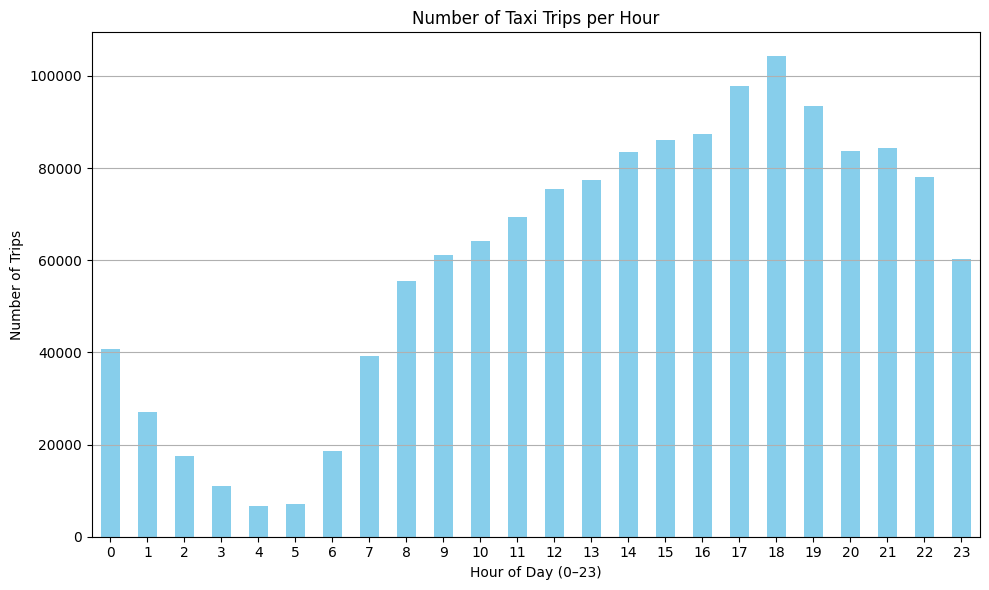

(np.int32(18), 104225)

In [86]:
# Visualise the number of trips per hour and find the busiest hour

# Counting the number of trips per hour
trips_per_hour = df2['pickup_hour'].value_counts().sort_index()

# Trying to identify the busiest hours
busiest_hour = trips_per_hour.idxmax()
busiest_hour_count = trips_per_hour.max()

plt.figure(figsize=(10, 6))
trips_per_hour.plot(kind='bar', color='skyblue')
plt.title('Number of Taxi Trips per Hour')
plt.xlabel('Hour of Day (0–23)')
plt.ylabel('Number of Trips')
plt.xticks(rotation=0)
plt.grid(axis='y')
plt.tight_layout()
plt.show()

(busiest_hour, busiest_hour_count)

Remember, we took a fraction of trips. To find the actual number, you have to scale the number up by the sampling ratio.

**3.2.3** <font color = red>[2 mark]</font> <br>
Find the actual number of trips in the five busiest hours

In [87]:
# Scale up the number of trips

# Fill in the value of your sampling fraction and use that to scale up the numbers
sample_fraction = 0.05

# I have actually used 5% of data instead of 1% of data.
# i.e. In the starting of notebook instruction, it is mentioned to use the record size of around 3 million
# but I actually used 5% itself which is actually coming to 18.96 lakh records.
# So, whatever analysis is been done so far is with the high number of records only which is assumed to represent the actual population size correctly.


**3.2.4** <font color = red>[3 marks]</font> <br>
Compare hourly traffic pattern on weekdays. Also compare for weekend.

<Figure size 1000x600 with 0 Axes>

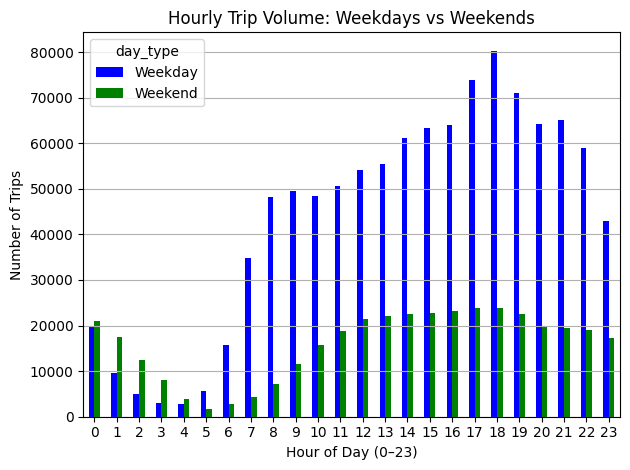

In [88]:
# Compare traffic trends for the week days and weekends

# Creating a new column for day type: Weekday or Weekend.
df2['day_type'] = df2['tpep_pickup_datetime'].dt.dayofweek.apply(lambda x: 'Weekend' if x >= 5 else 'Weekday')

# Counting the number of trips by hour and day type
trips_by_day_type = df2.groupby(['pickup_hour', 'day_type']).size().reset_index(name='trip_count')

pivot_df = trips_by_day_type.pivot(index='pickup_hour', columns='day_type', values='trip_count')

plt.figure(figsize=(10, 6))
pivot_df.plot(kind='bar', stacked=False, color=['blue', 'green'])
plt.title('Hourly Trip Volume: Weekdays vs Weekends')
plt.xlabel('Hour of Day (0–23)')
plt.ylabel('Number of Trips')
plt.xticks(rotation=0)
plt.grid(axis='y')
plt.tight_layout()
plt.show()


What can you infer from the above patterns? How will finding busy and quiet hours for each day help us?

**3.2.5** <font color = red>[3 marks]</font> <br>
Identify top 10 zones with high hourly pickups. Do the same for hourly dropoffs. Show pickup and dropoff trends in these zones.

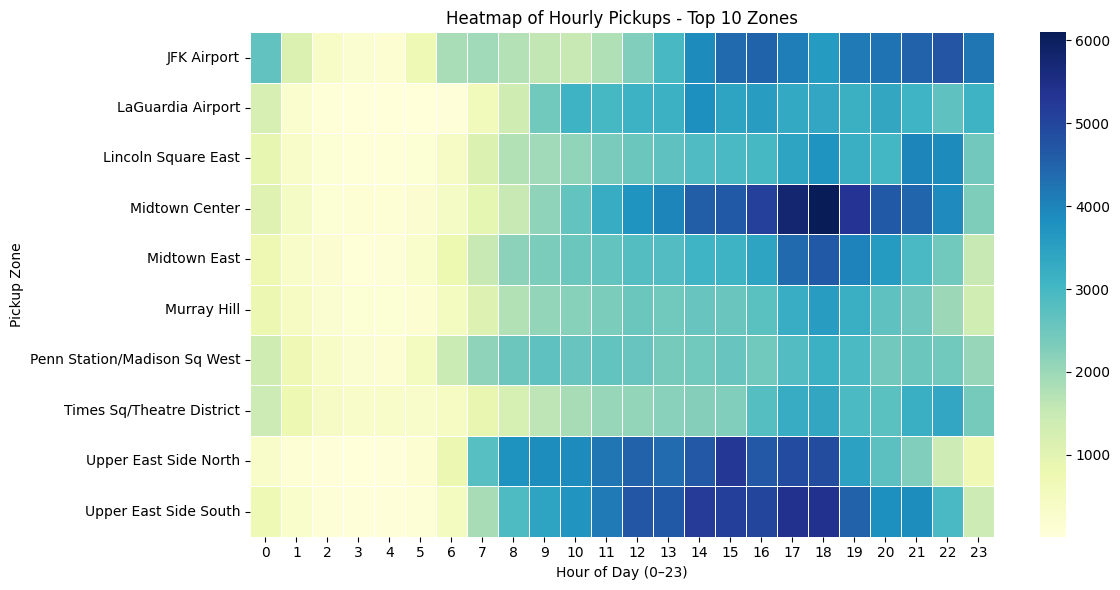

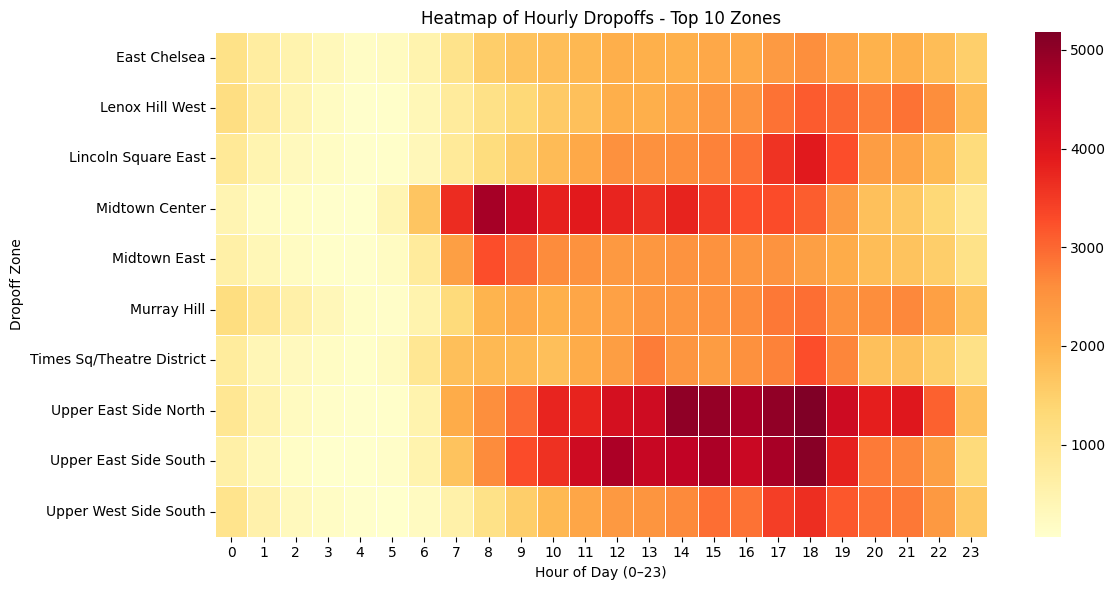

In [90]:
# Find top 10 pickup and dropoff zones

# Identify top pickup and dropoff zones
top_pickup_zones = df2.groupby('pickup_zone').size().sort_values(ascending=False).head(10).index.tolist()
top_dropoff_zones = df2.groupby('dropoff_zone').size().sort_values(ascending=False).head(10).index.tolist()

# Hourly trends
pickup_trends = df2[df2['pickup_zone'].isin(top_pickup_zones)].groupby(['pickup_hour', 'pickup_zone']).size().unstack().fillna(0)
dropoff_trends = df2[df2['dropoff_zone'].isin(top_dropoff_zones)].groupby(['pickup_hour', 'dropoff_zone']).size().unstack().fillna(0)

# Heatmap for Pickup Trends
plt.figure(figsize=(12, 6))
sns.heatmap(pickup_trends.T, cmap='YlGnBu', linewidths=0.5)
plt.title('Heatmap of Hourly Pickups - Top 10 Zones')
plt.xlabel('Hour of Day (0–23)')
plt.ylabel('Pickup Zone')
plt.tight_layout()
plt.show()

# Heatmap for Dropoff Trends
plt.figure(figsize=(12, 6))
sns.heatmap(dropoff_trends.T, cmap='YlOrRd', linewidths=0.5)
plt.title('Heatmap of Hourly Dropoffs - Top 10 Zones')
plt.xlabel('Hour of Day (0–23)')
plt.ylabel('Dropoff Zone')
plt.tight_layout()
plt.show()

**3.2.6** <font color = red>[3 marks]</font> <br>
Find the ratio of pickups and dropoffs in each zone. Display the 10 highest (pickup/drop) and 10 lowest (pickup/drop) ratios.

In [91]:
# Find the top 10 and bottom 10 pickup/dropoff ratios

pickup_counts = df2['pickup_zone'].value_counts()
dropoff_counts = df2['dropoff_zone'].value_counts()

zone_ratios = pd.DataFrame({'pickup_count': pickup_counts,'dropoff_count': dropoff_counts}).fillna(0)
zone_ratios['pickup_dropoff_ratio'] = zone_ratios['pickup_count'] / (zone_ratios['dropoff_count'] + 1e-5)

top_10_ratios = zone_ratios.sort_values(by='pickup_dropoff_ratio', ascending=False).head(10)
bottom_10_ratios = zone_ratios.sort_values(by='pickup_dropoff_ratio', ascending=True).head(10)

print("Top 10 Zones by Pickup/Dropoff Ratio:\n")
print(top_10_ratios[['pickup_count', 'dropoff_count', 'pickup_dropoff_ratio']])

print("\nBottom 10 Zones by Pickup/Dropoff Ratio:\n")
print(bottom_10_ratios[['pickup_count', 'dropoff_count', 'pickup_dropoff_ratio']])

Top 10 Zones by Pickup/Dropoff Ratio:

                                  pickup_count  dropoff_count  \
Rikers Island                              2.0            0.0   
Jamaica Bay                                2.0            0.0   
East Elmhurst                           6388.0          478.0   
JFK Airport                            63303.0        14883.0   
LaGuardia Airport                      51372.0        19864.0   
Saint Michaels Cemetery/Woodside          12.0            6.0   
Penn Station/Madison Sq West           48334.0        29618.0   
Greenwich Village South                20070.0        14447.0   
Central Park                           23816.0        17269.0   
West Village                           34175.0        25604.0   

                                  pickup_dropoff_ratio  
Rikers Island                            200000.000000  
Jamaica Bay                              200000.000000  
East Elmhurst                                13.364016  
JFK Airport      

**3.2.7** <font color = red>[3 marks]</font> <br>
Identify zones with high pickup and dropoff traffic during night hours (11PM to 5AM)

In [93]:
# During night hours (11pm to 5am) find the top 10 pickup and dropoff zones
# Note that the top zones should be of night hours and not the overall top zones

night_df = df2[(df2['pickup_hour'] >= 23) | (df2['pickup_hour'] <= 5)]
top_night_pickup_zones = (night_df.groupby('pickup_zone').size().sort_values(ascending=False).head(10).reset_index(name='pickup_count'))
top_night_dropoff_zones = (night_df.groupby('dropoff_zone').size().sort_values(ascending=False).head(10).reset_index(name='dropoff_count'))

print(top_night_pickup_zones)
print(top_night_dropoff_zones)

                    pickup_zone  pickup_count
0                  East Village         13043
1                  West Village         10628
2                   JFK Airport          9467
3                  Clinton East          8180
4               Lower East Side          8179
5       Greenwich Village South          7389
6     Times Sq/Theatre District          5959
7  Penn Station/Madison Sq West          5376
8                 Midtown South          4869
9                  East Chelsea          4780
            dropoff_zone  dropoff_count
0           East Village           6815
1           Clinton East           5199
2            Murray Hill           5062
3               Gramercy           4867
4        Lenox Hill West           4588
5           East Chelsea           4564
6         Yorkville West           4365
7           West Village           4144
8  Upper West Side South           3853
9  Upper East Side North           3763


Now, let us find the revenue share for the night time hours and the day time hours. After this, we will move to deciding a pricing strategy.

**3.2.8** <font color = red>[2 marks]</font> <br>
Find the revenue share for nighttime and daytime hours.

In [94]:
# Filter for night hours (11 PM to 5 AM)

night_df = df2[(df2['pickup_hour'] >= 23) | (df2['pickup_hour'] <= 5)]
day_df = df2[(df2['pickup_hour'] >= 6) & (df2['pickup_hour'] <= 22)]

night_revenue = night_df['total_amount'].sum()
day_revenue = day_df['total_amount'].sum()
total_revenue = night_revenue + day_revenue

night_share = (night_revenue / total_revenue) * 100
day_share = (day_revenue / total_revenue) * 100

print(f"Nighttime Revenue (11PM–5AM): ${night_revenue:,.2f} ({night_share:.2f}%)")
print(f"Daytime Revenue (6AM–10PM): ${day_revenue:,.2f} ({day_share:.2f}%)")

Nighttime Revenue (11PM–5AM): $5,139,018.27 (12.10%)
Daytime Revenue (6AM–10PM): $37,329,455.18 (87.90%)


##### Pricing Strategy

**3.2.9** <font color = red>[2 marks]</font> <br>
For the different passenger counts, find the average fare per mile per passenger.

For instance, suppose the average fare per mile for trips with 3 passengers is 3 USD/mile, then the fare per mile per passenger will be 1 USD/mile.

In [96]:
# Analyse the fare per mile per passenger for different passenger counts


valid_df = df2[(df2['trip_distance'] > 0) & (df2['fare_amount'] > 0)]
valid_df['fare_per_mile_per_passenger'] = valid_df['fare_amount'] / (valid_df['trip_distance'] * valid_df['passenger_count'])
fare_stats = valid_df.groupby('passenger_count')['fare_per_mile_per_passenger'].mean().reset_index()
fare_stats.columns = ['passenger_count', 'avg_fare_per_mile_per_passenger']
fare_stats = fare_stats.sort_values(by='passenger_count')
print(fare_stats)


   passenger_count  avg_fare_per_mile_per_passenger
0              1.0                         9.271706
1              2.0                         5.002502
2              3.0                         3.328445
3              4.0                         3.932641
4              5.0                         1.589057
5              6.0                         1.284694


**3.2.10** <font color = red>[3 marks]</font> <br>
Find the average fare per mile by hours of the day and by days of the week

In [97]:
# Compare the average fare per mile for different days and for different times of the day

valid_df = df2[(df2['trip_distance'] > 0) & (df2['fare_amount'] > 0)]

# ----------------------------
# 1. Avg Fare per Mile by Hour
# ----------------------------
fare_per_mile_by_hour = (
    valid_df.groupby('pickup_hour')
    .apply(lambda x: (x['fare_amount'] / x['trip_distance']).mean())
    .reset_index(name='avg_fare_per_mile')
)

# ------------------------------------
# 2. Avg Fare per Mile by Day of Week
# ------------------------------------
fare_per_mile_by_day = (
    valid_df.groupby('day_of_week')
    .apply(lambda x: (x['fare_amount'] / x['trip_distance']).mean())
    .reset_index(name='avg_fare_per_mile')
)

weekday_order = ['Mon', 'Tue', 'Wed', 'Thu', 'Fri', 'Sat', 'Sun']
fare_per_mile_by_day['day_of_week'] = pd.Categorical(fare_per_mile_by_day['day_of_week'], categories=weekday_order, ordered=True)
fare_per_mile_by_day = fare_per_mile_by_day.sort_values('day_of_week')

print("Average Fare per Mile by Hour:")
print(fare_per_mile_by_hour)

print("\nAverage Fare per Mile by Day of the Week:")
print(fare_per_mile_by_day)

Average Fare per Mile by Hour:
    pickup_hour  avg_fare_per_mile
0             0           7.695809
1             1           8.725306
2             2           7.968086
3             3           7.567475
4             4          10.737238
5             5          11.671476
6             6           9.808759
7             7           9.046344
8             8           9.008432
9             9           9.261554
10           10           9.320779
11           11           9.752882
12           12           9.965664
13           13          10.103210
14           14          10.153175
15           15          10.240760
16           16          12.249216
17           17          10.483512
18           18           9.753721
19           19           9.335176
20           20           8.004589
21           21           8.002794
22           22           8.319570
23           23           8.597184

Average Fare per Mile by Day of the Week:
  day_of_week  avg_fare_per_mile
1         Mon     

**3.2.11** <font color = red>[3 marks]</font> <br>
Analyse the average fare per mile for the different vendors for different hours of the day

             Vendor 1   Vendor 2
pickup_hour                     
0            6.676452   7.971276
1            6.757593   9.259552
2            6.857146   8.276545
3            6.343897   7.888909
4            7.035877  11.661723
5            7.132708  13.037537
6            6.373524  11.025096
7            7.004868   9.785223
8            7.923810   9.393350
9            8.246762   9.621159
10           8.215140   9.710650
11           8.529401  10.173238
12           8.613586  10.427949
13           8.514549  10.658907
14           8.524240  10.712428
15           8.544848  10.817174
16           8.671972  13.462659
17           8.481118  11.144691
18           8.244592  10.240139
19           7.715875   9.843065
20           7.233751   8.240139
21           7.049285   8.277767
22           6.787435   8.751326
23           6.689135   9.130026


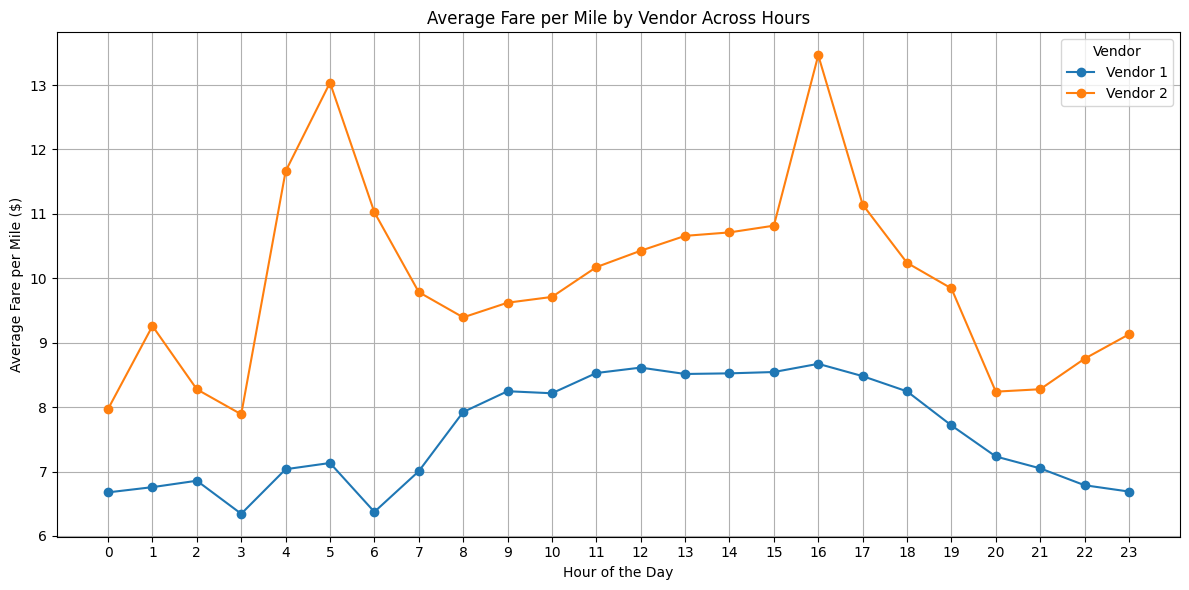

In [98]:
# Compare fare per mile for different vendors

valid_df = df2[(df2['trip_distance'] > 0) & (df2['fare_amount'] > 0)]
vendor_hourly_fare = (valid_df.groupby(['VendorID', 'pickup_hour']).apply(lambda x: (x['fare_amount'] / x['trip_distance']).mean()).reset_index(name='avg_fare_per_mile'))

pivot_table = vendor_hourly_fare.pivot(index='pickup_hour', columns='VendorID', values='avg_fare_per_mile')
pivot_table.columns = [f"Vendor {col}" for col in pivot_table.columns]
print(pivot_table)

pivot_table.plot(figsize=(12, 6), marker='o')
plt.title("Average Fare per Mile by Vendor Across Hours")
plt.xlabel("Hour of the Day")
plt.ylabel("Average Fare per Mile ($)")
plt.grid(True)
plt.xticks(range(0, 24))
plt.tight_layout()
plt.legend(title='Vendor')
plt.show()


**3.2.12** <font color = red>[5 marks]</font> <br>
Compare the fare rates of the different vendors in a tiered fashion. Analyse the average fare per mile for distances upto 2 miles. Analyse the fare per mile for distances from 2 to 5 miles. And then for distances more than 5 miles.


In [99]:
# Defining distance tiers

def distance_tier(dist):
    if dist <= 2:
        return '≤ 2 miles'
    elif dist <= 5:
        return '2–5 miles'
    else:
        return '> 5 miles'

# Create the tier column
df2['distance_tier'] = df2['trip_distance'].apply(distance_tier)

# Calculate fare per mile
df2['fare_per_mile'] = df2['fare_amount'] / df2['trip_distance']

# Group by vendor and distance tier
tiered_vendor_fares = df2.groupby(['VendorID', 'distance_tier'])['fare_per_mile'].mean().reset_index()

# Pivot for better display
pivot_fares = tiered_vendor_fares.pivot(index='distance_tier', columns='VendorID', values='fare_per_mile')
pivot_fares.columns = [f'Vendor {int(col)}' for col in pivot_fares.columns]
pivot_fares = pivot_fares.reset_index()

# Display the result
print(pivot_fares)

# To sort the table in logical order:
tier_order = ['≤ 2 miles', '2–5 miles', '> 5 miles']

# Convert to categorical for sorting
pivot_fares['distance_tier'] = pd.Categorical(
    pivot_fares['distance_tier'],
    categories=tier_order,
    ordered=True
)

# Sort by the defined tier order
pivot_fares = pivot_fares.sort_values('distance_tier')
# Display the result
print(pivot_fares)

  distance_tier  Vendor 1   Vendor 2
0     2–5 miles  6.357831   6.532046
1     > 5 miles  4.471764   4.488735
2     ≤ 2 miles  9.500812  13.699284
  distance_tier  Vendor 1   Vendor 2
2     ≤ 2 miles  9.500812  13.699284
0     2–5 miles  6.357831   6.532046
1     > 5 miles  4.471764   4.488735


##### Customer Experience and Other Factors

**3.2.13** <font color = red>[5 marks]</font> <br>
Analyse average tip percentages based on trip distances, passenger counts and time of pickup. What factors lead to low tip percentages?

In [100]:
#  Analyze tip percentages based on distances, passenger counts and pickup times

df2['tip_percent'] = (df2['tip_amount'] / df2['fare_amount']) * 100
df2 = df2[df2['fare_amount'] > 0]  # avoid division by zero

def distance_tier(dist):
    if dist <= 2:
        return '≤ 2 miles'
    elif dist <= 5:
        return '2–5 miles'
    else:
        return '> 5 miles'

df2['distance_tier'] = df2['trip_distance'].apply(distance_tier)

tip_by_distance = df2.groupby('distance_tier')['tip_percent'].mean().reindex(['≤ 2 miles', '2–5 miles', '> 5 miles'])
print("Average Tip % by Distance:")
print(tip_by_distance)

tip_by_passenger = df2.groupby('passenger_count')['tip_percent'].mean().sort_index()
print("\nAverage Tip % by Passenger Count:")
print(tip_by_passenger)

tip_by_hour = df2.groupby('pickup_hour')['tip_percent'].mean().sort_index()
print("\nAverage Tip % by Pickup Hour:")
print(tip_by_hour)



Average Tip % by Distance:
distance_tier
≤ 2 miles    28.766632
2–5 miles    23.057904
> 5 miles    23.386080
Name: tip_percent, dtype: float64

Average Tip % by Passenger Count:
passenger_count
1.0    26.335833
2.0    25.816991
3.0    25.807752
4.0    25.889828
5.0    26.048762
6.0    26.162098
Name: tip_percent, dtype: float64

Average Tip % by Pickup Hour:
pickup_hour
0     25.705108
1     25.987113
2     26.387643
3     27.293260
4     26.488570
5     25.600877
6     24.939277
7     24.773164
8     24.800710
9     25.148426
10    25.454096
11    25.438090
12    25.321440
13    25.347968
14    25.124767
15    24.951773
16    26.999836
17    30.691631
18    27.436148
19    27.335404
20    26.404940
21    26.192785
22    25.909230
23    25.627504
Name: tip_percent, dtype: float64


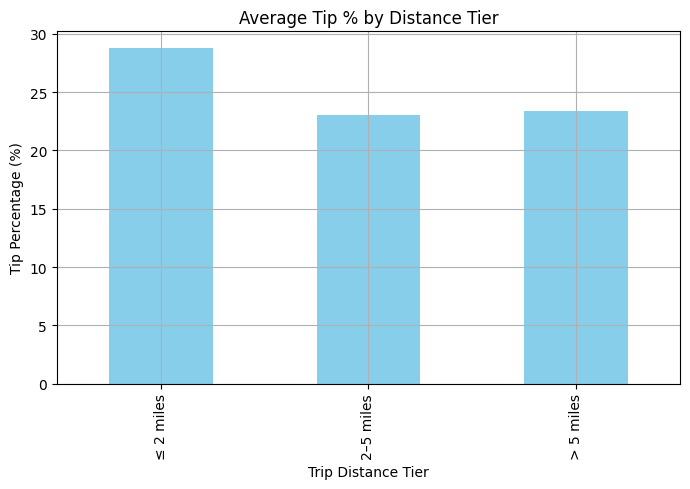

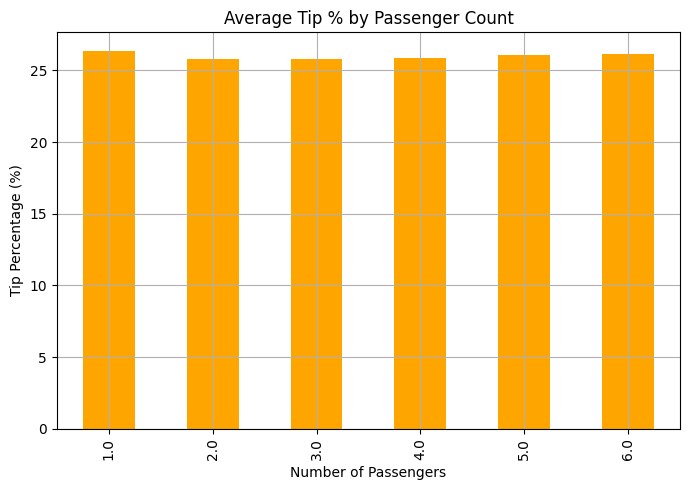

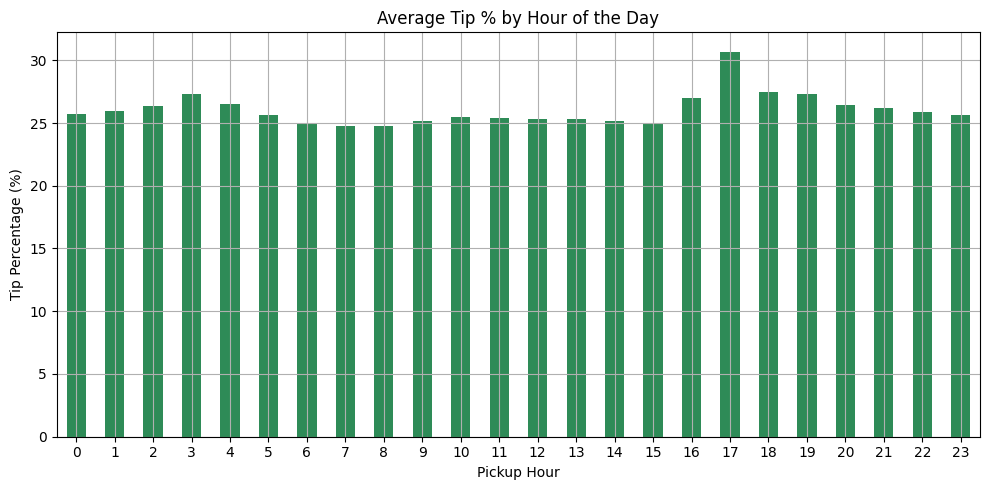

In [101]:
# Charts for above 3.2.13 question

tip_by_distance.plot(kind='bar', color='skyblue', figsize=(7, 5))
plt.title('Average Tip % by Distance Tier')
plt.ylabel('Tip Percentage (%)')
plt.xlabel('Trip Distance Tier')
plt.grid(True)
plt.tight_layout()
plt.show()

tip_by_passenger.plot(kind='bar', color='orange', figsize=(7, 5))
plt.title('Average Tip % by Passenger Count')
plt.ylabel('Tip Percentage (%)')
plt.xlabel('Number of Passengers')
plt.grid(True)
plt.tight_layout()
plt.show()


tip_by_hour.plot(kind='bar', color='seagreen', figsize=(10, 5))
plt.title('Average Tip % by Hour of the Day')
plt.ylabel('Tip Percentage (%)')
plt.xlabel('Pickup Hour')
plt.grid(True)
plt.xticks(rotation=0)
plt.tight_layout()
plt.show()

Additional analysis [optional]: Let's try comparing cases of low tips with cases of high tips to find out if we find a clear aspect that drives up the tipping behaviours

In [102]:
# Compare trips with tip percentage < 10% to trips with tip percentage > 25%

df2['tip_percent'] = (df2['tip_amount'] / df2['fare_amount']) * 100

# Define the two tipping groups
low_tip_trips = df2[df2['tip_percent'] < 10]
high_tip_trips = df2[df2['tip_percent'] > 25]

# Summarize metrics for both groups
comparison_summary = pd.DataFrame({
    'Metric': ['Average Fare', 'Average Distance', 'Average Duration (min)', 'Average Passengers'],
    'Low Tip (<10%)': [
        low_tip_trips['fare_amount'].mean(),
        low_tip_trips['trip_distance'].mean(),
        low_tip_trips['trip_duration'].mean(),
        low_tip_trips['passenger_count'].mean()
    ],
    'High Tip (>25%)': [
        high_tip_trips['fare_amount'].mean(),
        high_tip_trips['trip_distance'].mean(),
        high_tip_trips['trip_duration'].mean(),
        high_tip_trips['passenger_count'].mean()
    ]
})

print(comparison_summary)

                   Metric  Low Tip (<10%)  High Tip (>25%)
0            Average Fare       26.527114        14.464614
1        Average Distance        4.942154         2.316314
2  Average Duration (min)       22.584954        12.777106
3      Average Passengers        1.364398         1.364258


**3.2.14** <font color = red>[3 marks]</font> <br>
Analyse the variation of passenger count across hours and days of the week.

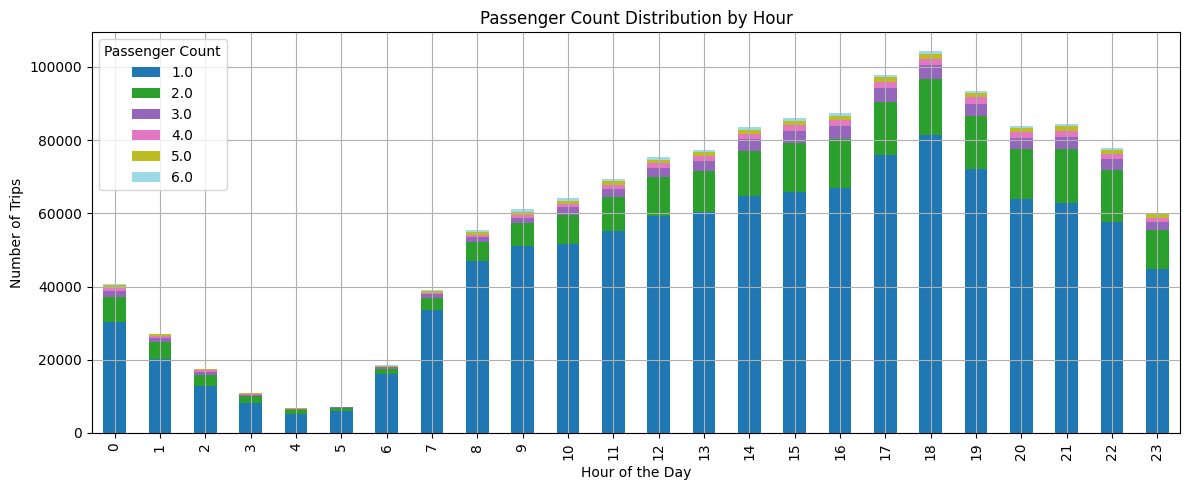

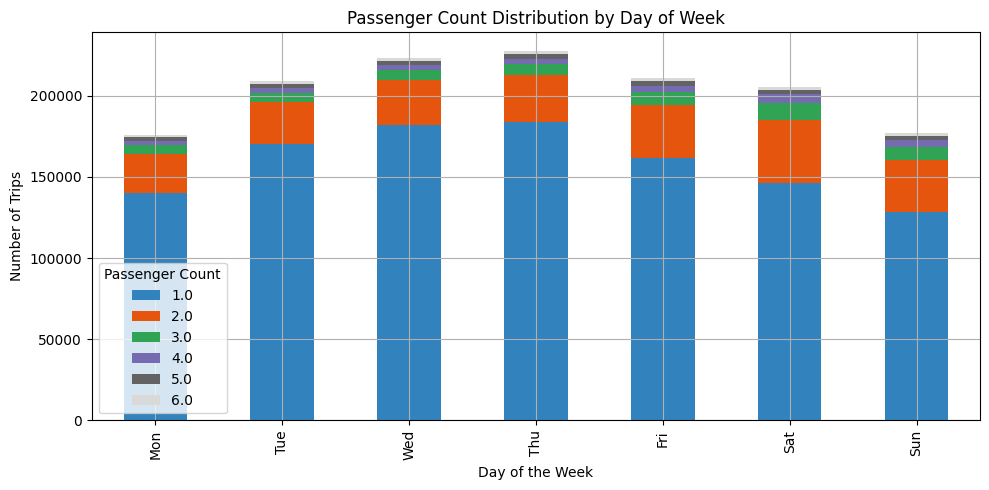

In [103]:
# See how passenger count varies across hours and days

# Passenger count distribution by hour
hourly_passenger_dist = df2.groupby(['pickup_hour', 'passenger_count']).size().unstack(fill_value=0)
hourly_passenger_dist.plot(kind='bar', stacked=True, colormap='tab20', figsize=(12, 5))
plt.title("Passenger Count Distribution by Hour")
plt.xlabel("Hour of the Day")
plt.ylabel("Number of Trips")
plt.legend(title="Passenger Count")
plt.tight_layout()
plt.grid(True)
plt.show()

# Passenger count distribution by Day of Week
ordered_days = ['Mon', 'Tue', 'Wed', 'Thu', 'Fri', 'Sat', 'Sun']
daily_passenger_dist = df2.groupby(['day_of_week', 'passenger_count']).size().unstack(fill_value=0).reindex(ordered_days)

daily_passenger_dist.plot(kind='bar', stacked=True, colormap='tab20c', figsize=(10, 5))
plt.title("Passenger Count Distribution by Day of Week")
plt.xlabel("Day of the Week")
plt.ylabel("Number of Trips")
plt.legend(title="Passenger Count")
plt.tight_layout()
plt.grid(True)
plt.show()


**3.2.15** <font color = red>[2 marks]</font> <br>
Analyse the variation of passenger counts across zones

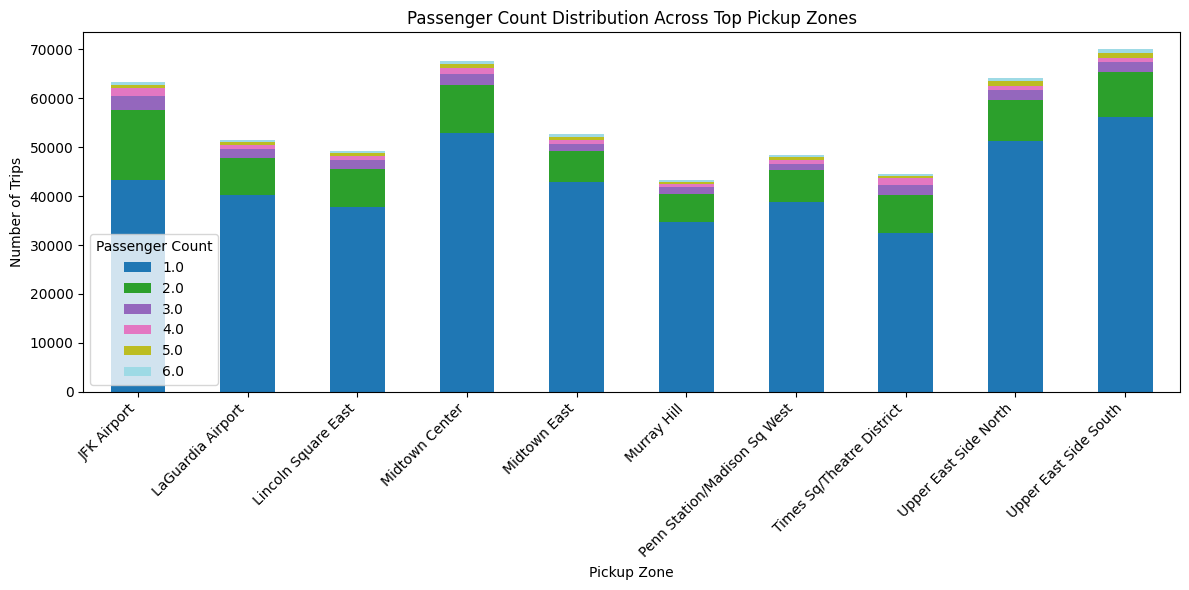

In [104]:
# How does passenger count vary across zones

zone_passenger_avg = df2.groupby('pickup_zone')['passenger_count'].mean().sort_values(ascending=False)
zone_passenger_avg.head(10)  # Top 10 zones by average passenger count

# Selecting top 10 busiest pickup zones
top_zones = df2['pickup_zone'].value_counts().head(10).index

# Filtering for top zones
df_top_zones = df2[df2['pickup_zone'].isin(top_zones)]

# Grouping by pickup_zone and passenger_count
zone_passenger_counts = df_top_zones.groupby(['pickup_zone', 'passenger_count']).size().unstack(fill_value=0)

# Plotting stacked bar chart
zone_passenger_counts.plot(kind='bar', stacked=True, figsize=(12, 6), colormap='tab20')
plt.title('Passenger Count Distribution Across Top Pickup Zones')
plt.xlabel('Pickup Zone')
plt.ylabel('Number of Trips')
plt.xticks(rotation=45, ha='right')
plt.legend(title='Passenger Count')
plt.tight_layout()
plt.show()



In [105]:
# For a more detailed analysis, we can use the zones_with_trips GeoDataFrame
# Create a new column for the average passenger count in each zone.

# Calculating average passenger count per pickup zone
avg_passenger_per_zone = df2.groupby('pickup_zone')['passenger_count'].mean().reset_index()
avg_passenger_per_zone.rename(columns={'passenger_count': 'avg_passenger_count'}, inplace=True)

# Merging it with the zones GeoDataFrame using 'zone' as key
zones_with_trips = zones.merge(avg_passenger_per_zone, how='left', left_on='zone', right_on='pickup_zone')

# Dropping the redundant column only if it exists (safe approach)
if 'pickup_zone' in zones_with_trips.columns:
    zones_with_trips.drop(columns=['pickup_zone'], inplace=True)

# View sample
zones_with_trips[['zone', 'trip_count', 'avg_passenger_count']].head()


zone  trip_count  avg_passenger_count
0           Newark Airport        37.0             1.324324
1              Jamaica Bay         2.0             1.000000
2  Allerton/Pelham Gardens         0.0                  NaN
3            Alphabet City      1670.0             1.373054
4            Arden Heights         0.0                  NaN

Find out how often surcharges/extra charges are applied to understand their prevalance

**3.2.16** <font color = red>[5 marks]</font> <br>
Analyse the pickup/dropoff zones or times when extra charges are applied more frequently

extra applied in 881012 trips (61.62%)
mta_tax applied in 1421361 trips (99.41%)
improvement_surcharge applied in 1429721 trips (100.00%)
congestion_surcharge applied in 1358998 trips (95.05%)
airport_fees applied in 115148 trips (8.05%)


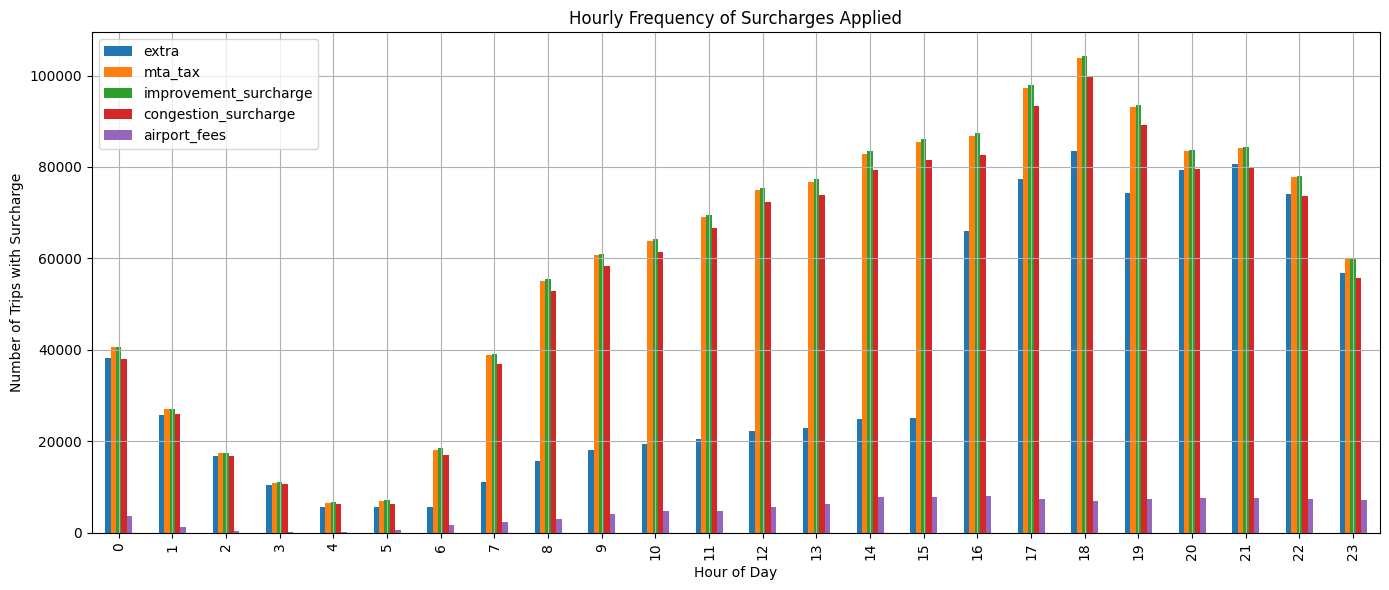

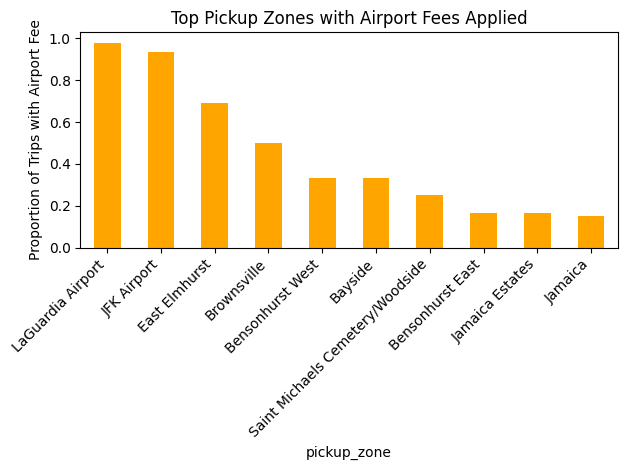

In [107]:
# How often is each surcharge applied?

# Count how often each surcharge type is applied (non-zero values)
surcharge_cols = ['extra', 'mta_tax', 'improvement_surcharge', 'congestion_surcharge', 'airport_fees']

for col in surcharge_cols:
    applied_count = (df2[col] > 0).sum()
    print(f"{col} applied in {applied_count} trips ({(applied_count / len(df2)) * 100:.2f}%)")


# Frequency of surcharge by pickup hour
surcharge_hourly = df2.groupby('pickup_hour')[surcharge_cols].apply(lambda x: (x > 0).sum())
surcharge_hourly.plot(kind='bar', figsize=(14, 6))
plt.title('Hourly Frequency of Surcharges Applied')
plt.ylabel('Number of Trips with Surcharge')
plt.xlabel('Hour of Day')
plt.grid(True)
plt.tight_layout()
plt.show()

# Group by pickup zone and calculate how often surcharges were applied
zone_surcharge_counts = df2[df2['pickup_zone'].notnull()].groupby('pickup_zone')[surcharge_cols].apply(lambda x: (x > 0).sum())
zone_surcharge_props = zone_surcharge_counts.div(df2.groupby('pickup_zone').size(), axis=0).fillna(0)

# Show top zones with most frequent 'airport_fees'
zone_surcharge_props['airport_fees'].sort_values(ascending=False).head(10)

zone_surcharge_props['airport_fees'].sort_values(ascending=False).head(10).plot(kind='bar', color='orange')
plt.title('Top Pickup Zones with Airport Fees Applied')
plt.ylabel('Proportion of Trips with Airport Fee')
plt.xticks(rotation=45, ha='right')
plt.tight_layout()
plt.show()


## **4** Conclusion
<font color = red>[15 marks]</font> <br>

### **4.1** Final Insights and Recommendations
<font color = red>[15 marks]</font> <br>

Conclude your analyses here. Include all the outcomes you found based on the analysis.

Based on the insights, frame a concluding story explaining suitable parameters such as location, time of the day, day of the week etc. to be kept in mind while devising a strategy to meet customer demand and optimise supply.

**4.1.1** <font color = red>[5 marks]</font> <br>
Recommendations to optimize routing and dispatching based on demand patterns and operational inefficiencies

- Dynamic dispatch during peak hours (4 PM–7 PM): The highest trip volume occurs during late afternoon and early evening, especially on weekdays. Cabs should be proactively routed and stationed in high-demand zones like Midtown Center, Upper East Side South, and Times Square/Theatre District during these hours.

- Nighttime focus on specific hotspots: During night hours (11 PM–5 AM), areas like East Village, West Village, JFK Airport, and Lower East Side show elevated activity. Use predictive dispatching models to position cabs near nightlife and airport areas to reduce wait times and improve coverage.

- Slow route detection: Routes such as Seaport to Two Bridges/Seward Park or Central Harlem to Central Harlem exhibit extremely low average speeds (<1 mph). These routes should be deprioritized or avoided during certain hours due to inefficiency.

Parameters to consider:
 - Pickup hour (busiest: 17–18)
 - Slow-speed zones by hour (geospatial congestion patterns)
 - Day type (weekday/weekend behavior varies)

**4.1.2** <font color = red>[5 marks]</font> <br>

Suggestions on strategically positioning cabs across different zones to make best use of insights uncovered by analysing trip trends across time, days and months.

Recommendations:

- Zone-based scheduling: High-demand zones like JFK Airport, Midtown Center, Upper East Side South, and LaGuardia Airport should have an increased cab density during morning and evening rush hours.

- Heatmap-based allocation: Use historical hourly pickup/dropoff heatmaps to inform zone-specific positioning. For instance:
 - Airport zones peak in early morning and late night — align shifts accordingly.
 - Commercial zones (Midtown) peak in early evening — ensure supply is ready before the peak.

- Demand-aware supply control: Reduce idle time by reallocating cabs from slow zones to consistently high-volume areas like Penn Station/Madison Sq West and Times Square during mid-day lulls

Parameters to consider:
 - Zone-specific pickup trends (heatmap analysis)
 - Hour of day (demand cycles)
 - Day of week (weekday > weekend differences)
 - Night-only hotspot zones

**4.1.3** <font color = red>[5 marks]</font> <br>
Propose data-driven adjustments to the pricing strategy to maximize revenue while maintaining competitive rates with other vendors.

Recommendations:

- Distance-based tier pricing:
Our tiered analysis reveals that short trips (≤2 miles) generate higher fare-per-mile. Consider:
 - Minimum fare increase for <2 miles (especially during peak)
 - Encourage pooling/volume optimization for <2 miles to maintain margins

- Time-based surge model: Average fare per mile surges notably at 4–6 AM and 4–7 PM. Introduce time-bound premium multipliers in these windows to maximize revenue without harming competitiveness.

- Vendor-based adjustments: Vendor 2 charges notably higher per-mile fare in short and medium distance ranges. NYC Taxi Co. (if Vendor 1) can compete better by:
 - Offering small discounts/promotions on 2–5 mile range
 - Improving ride experience to justify higher margins

Parameters to consider:
 - Fare per mile vs. distance tier
 - Hourly fare dynamics
 - Vendor-wise pricing differences
 - Surcharge patterns (e.g., congestion surcharge hits 95%+ of trips)